# **Proyecto Final**

## Integrantes
- **Jonk Keyler Sanchez Pabon : 2221551**
- **Nicolas Quintero Sierra : 2220090**


**Estadistica II grupo C1**

## 1. Descripción del dataset

### Conjunto de datos
El conjunto de datos seleccionado para el proyecto fue *Electric Power Consumption* , obtenido de [kaggle/datasets/electric-power-consumption](https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption) , este conjunto de datos corresponde al consumo de energía eléctica en la ciudad de *Tetouan, Morocco* durante el año del 2017 , el consumo esta ventaneado por diez minutos. En total se cuenta con 52,416 Observaciones de consumo de energía en una ventana de 10 minutos. Cada observación se describe con 9 columnas de características.Este conjunto de datos se cataloga como una serie de tiempo , ya que , son un conjunto de observaciones realizadas en un intervalo de tiempo regular y ordenadas cronologicamente.

### Objetivo
El objetivo de este proyecto es realizar un analisis exploratorio de los datos en primera instancia para revisar distribuciones y parametros de cada una de las variables y luego para identificar patrones y comportamientos en el consumo de energía eléctrica en la ciudad de Tetouan, Morocco durante el año 2017.

### Variables
Las variables que cuenta el conjunto de datos son las siguientes:
- ```Datetime```: Fecha y hora de la medición (actualmente en formato de texto).
- ```Temperature```: Temperatura en grados Celsius.
- ```Humidity```: Humedad en porcentaje.
- ```WindSpeed```: Velocidad del viento.
- ```GeneralDiffuseFlows```
- ```DiffuseFlows```: Flujos de radiación solar difusa.
- ```PowerConsumption_Zone1```, ```PowerConsumption_Zone2```, ```PowerConsumption_Zone3```: Consumo de energía en las tres zonas de Tetuán , Quads, Smir y Boussafou respectivamente , la unidad de consumo de energía electrica es *kWh*.

Las variables ```Temperature``` (°C), ```Humidity``` (%), ```WindSpeed``` , ```GeneralDiffuseFlows``` y ```DiffuseFlows``` representan factores meteorológicos que pueden influir en el consumo eléctrico.

- Temperatura (°C): Tiene sentido incluirla, ya que las variaciones térmicas pueden afectar la demanda energética (uso de calefacción en invierno y ventiladores o aire acondicionado en verano) , ademas , marruecos presenta un clima con veranos muy calurosos e inviernos frios.
- Humedad (%): También puede influir en la demanda energética. En climas húmedos, el uso de deshumidificadores o ventiladores puede aumentar el consumo.
- Velocidad del viento (WindSpeed): En teoría, podría afectar la sensación térmica y, en consecuencia, el consumo de calefacción o refrigeración. Sin embargo, en el contexto urbano de Tetuán, su impacto podría ser limitado.
- GeneralDiffuseFlows y DiffuseFlows (Radiación Solar Difusa): Son relevantes, ya que la radiación solar puede influir en la temperatura ambiente y en el uso de sistemas de climatización, además de ser un factor clave para la generación de energía solar.

En conclusión , Las nueve variables se denotan como importantes para el análisis de los datos, ya que, se espera que estas variables tengan una relación con el consumo de energía eléctrica en la ciudad de Tetouan, Morocco , por lo cual , ninguna de las variables sera eliminada del conjunto de datos.

## 2. Grafica de distribución de probabilidad para estas variables

Importando librerias necesarias para el analisis de los datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
plt.style.use('ggplot')

In [2]:
url_data='https://drive.google.com/uc?export=download&id=1vHnWlMTq32Wqf1TB1RbwYCx15tzF1uiX'

Los datos que se encuentran en formato ```csv``` se cargaran en un DataFrame de ```pandas``` para su posterior análisis.

In [3]:
df=pd.read_csv(url_data)
df

Datetime  Temperature  Humidity  WindSpeed  \
0         1/1/2017 0:00        6.559      73.8      0.083   
1         1/1/2017 0:10        6.414      74.5      0.083   
2         1/1/2017 0:20        6.313      74.5      0.080   
3         1/1/2017 0:30        6.121      75.0      0.083   
4         1/1/2017 0:40        5.921      75.7      0.081   
...                 ...          ...       ...        ...   
52411  12/30/2017 23:10        7.010      72.4      0.080   
52412  12/30/2017 23:20        6.947      72.6      0.082   
52413  12/30/2017 23:30        6.900      72.8      0.086   
52414  12/30/2017 23:40        6.758      73.0      0.080   
52415  12/30/2017 23:50        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062         0.100             29128.10127   
3                    0.091         0.096             28228.86076   
4                    0.048         0.085             27335.69620   
...                    ...           ...                     ...   
52411                0.040         0.096             31160.45627   
52412                0.051         0.093             30430.41825   
52413                0.084         0.074             29590.87452   
52414                0.066         0.089             28958.17490   
52415                0.062         0.111             28349.80989   

       PowerConsumption_Zone2  PowerConsumption_Zone3  
0                 16128.87538             20240.96386  
1                 19375.07599             20131.08434  
2                 19006.68693             19668.43373  
3                 18361.09422             18899.27711  
4                 17872.34043             18442.40964  
...                       ...                     ...  
52411             26857.31820             14780.31212  
52412             26124.57809             14428.81152  
52413             25277.69254             13806.48259  
52414             24692.23688             13512.60504  
52415             24055.23167             13345.49820  

[52416 rows x 9 columns]

In [ ]:
bins=int(1+np.log2(df.shape[0]))

Ajustando la variable ```Datetime``` a un formato de fecha y hora como una ```timestamp``` para facilitar el analisis de los datos.

In [4]:
df['time']=pd.to_datetime(df["Datetime"], format="%m/%d/%Y %H:%M")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  object        
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
 9   time                    52416 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.0+ MB


In [6]:
df.drop(columns=['Datetime'], inplace=True)

In [7]:
df.head()

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  DiffuseFlows  \
0        6.559      73.8      0.083                0.051         0.119   
1        6.414      74.5      0.083                0.070         0.085   
2        6.313      74.5      0.080                0.062         0.100   
3        6.121      75.0      0.083                0.091         0.096   
4        5.921      75.7      0.081                0.048         0.085   

   PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3  \
0             34055.69620             16128.87538             20240.96386   
1             29814.68354             19375.07599             20131.08434   
2             29128.10127             19006.68693             19668.43373   
3             28228.86076             18361.09422             18899.27711   
4             27335.69620             17872.34043             18442.40964   

                 time  
0 2017-01-01 00:00:00  
1 2017-01-01 00:10:00  
2 2017-01-01 00:20:00  
3 2017-01-01 00:30:00  
4 2017-01-01 00:40:00

Convertir la fecha en el indice del conjunto de datos

In [8]:
df.set_index('time',inplace=True)

A continuación se calculan algunos estadísticos descriptivos para cada una de las variables del conjunto de datos.

In [9]:
df.describe()

Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000            52416.000000   
mean      75.028022            32344.970564            21042.509082   
std      124.210949             7130.562564             5201.465892   
min        0.011000            13895.696200             8560.081466   
25%        0.122000            26310.668692            16980.766032   
50%        4.456000            32265.920340            20823.168405   
75%      101.000000            37309.018185            24713.717520   
max      936.000000            52204.395120            37408.860760   

       PowerConsumption_Zone3  
count            52416.000000  
mean             17835.406218  
std               6622.165099  
min               5935.174070  
25%              13129.326630  
50%              16415.117470  
75%              21624.100420  
max              47598.326360

Una primera vista de los datos

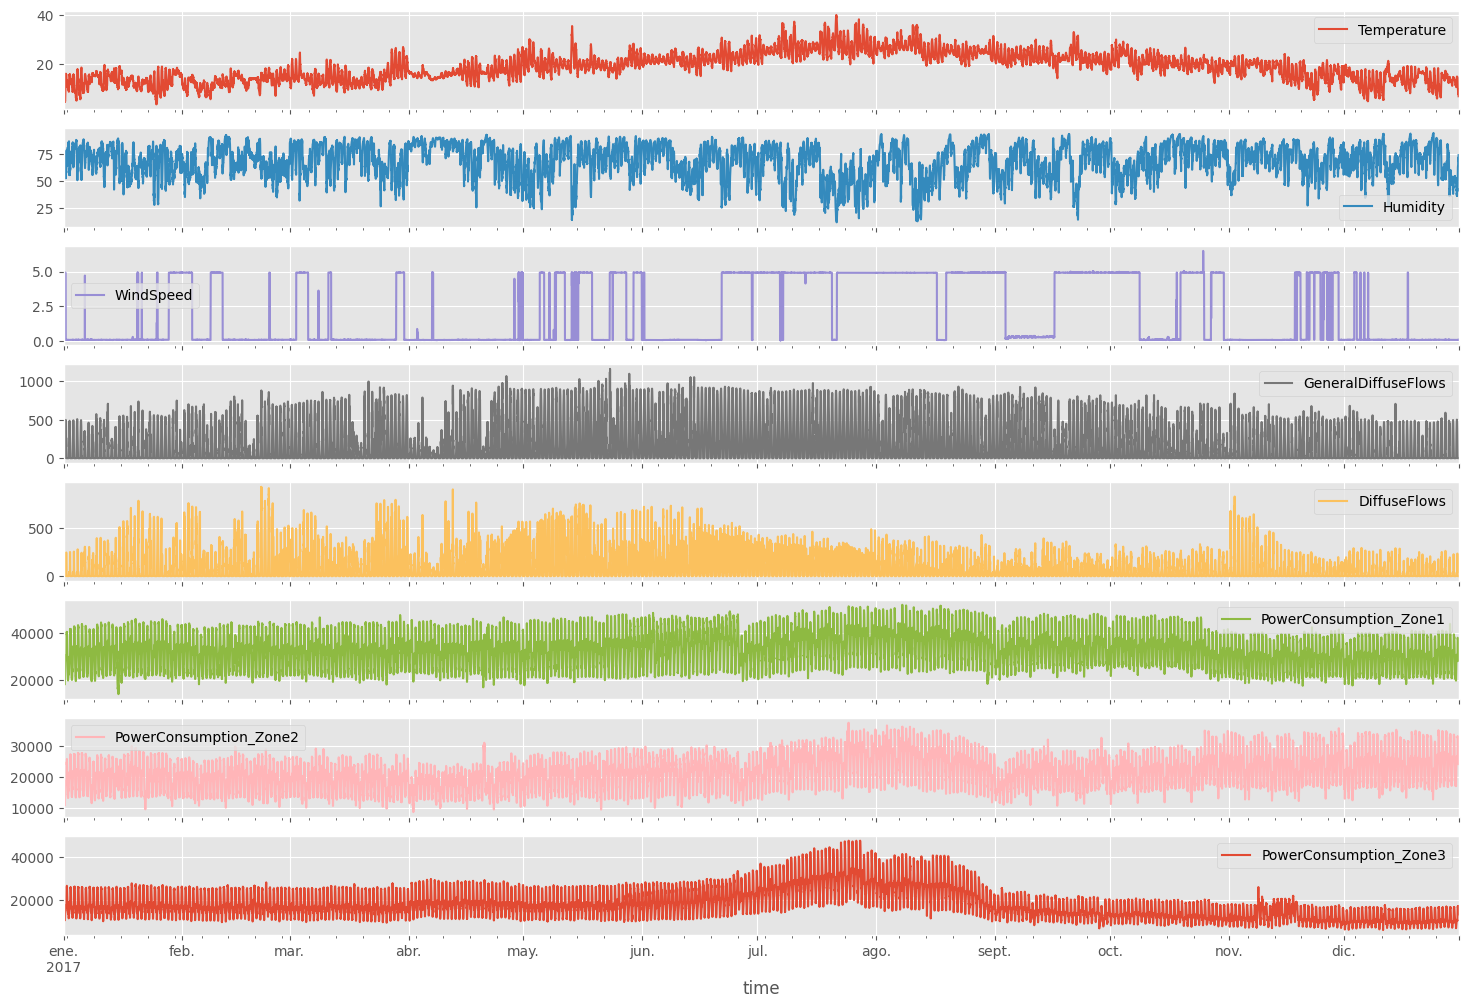

In [ ]:
df.plot(subplots=True,figsize=(18,12))
plt.savefig('img1.png',dpi=500,bbox_inches='tight')
plt.show()

Ahora de un intervalo mas pequeño de los datos

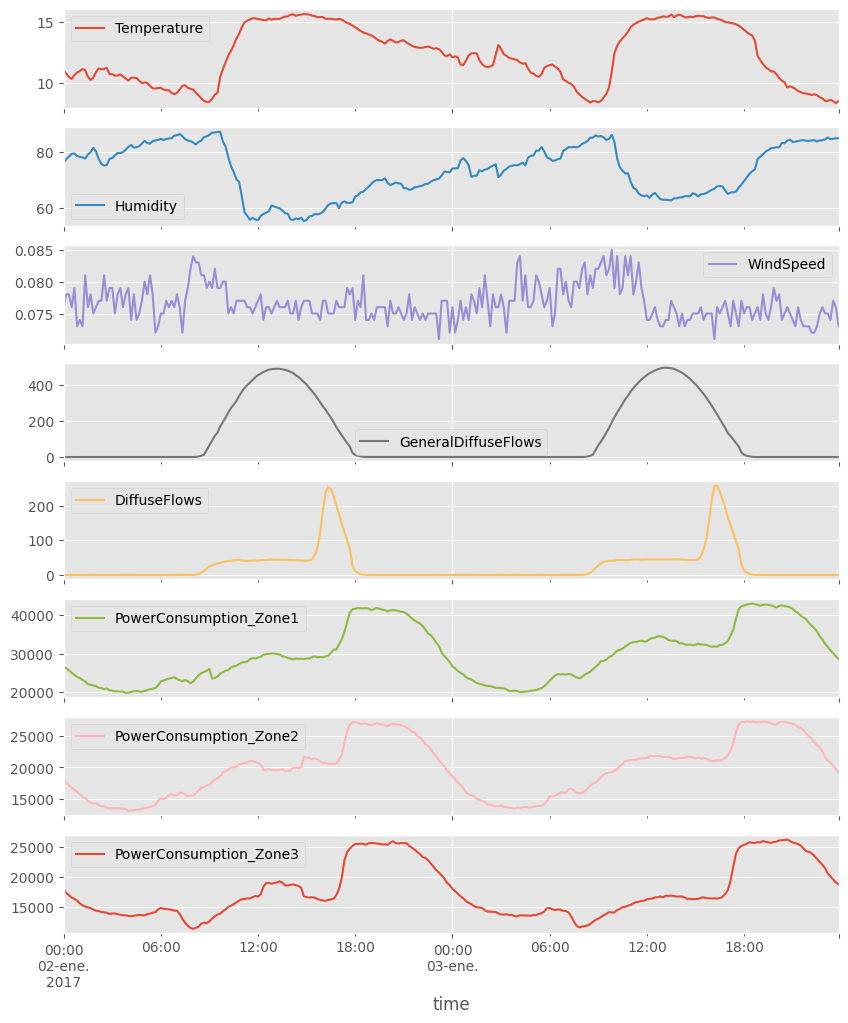

In [ ]:
df['2017-01-02':'2017-01-03'].plot(subplots=True,figsize=(10,12))
plt.show()

### Graficas de distribución de probabilidad de cada variables

In [ ]:
def hist_box(data,bins):
    mean=data.mean()
    median=data.median()
    mode=data.mode()[0]
    std=data.std()
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    sns.histplot(data,ax=ax[0],kde=True,bins=bins,color='blue')
    ax[0].axvline(mean,color='k',linestyle='dashed',linewidth=1.5,label='Mean')
    ax[0].axvline(median,color='r',linestyle='dashed',linewidth=1.5,label='Median')
    ax[0].axvline(mode,color='g',linestyle='dashed',linewidth=1.5,label='Mode')
    ax[0].text(ax[0].get_xlim()[1]*0.7,ax[0].get_ylim()[1]*0.9,rf'$\sigma$ = {std:.2f}')
    ax[0].legend()
    ax[0].set_title(f'Histogram of {data.name} and KDE')
    sns.boxplot(data,ax=ax[1],orient='v',color='red')
    ax[1].set_title(f'Boxplot of {data.name}')
    plt.show()

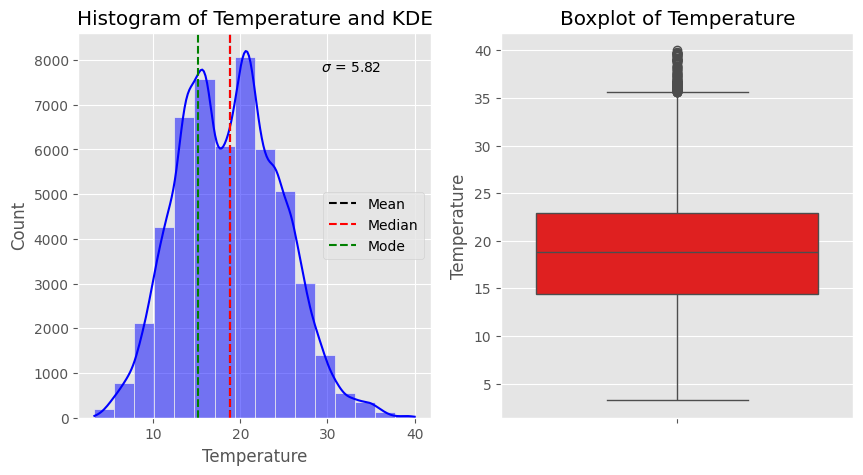

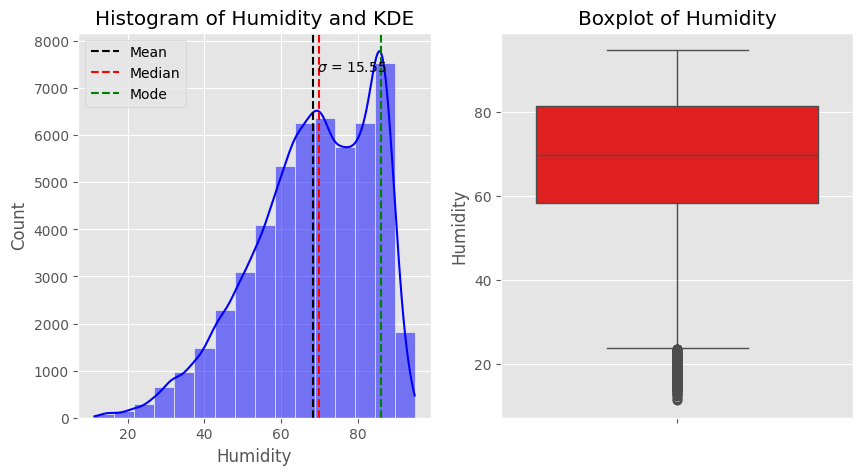

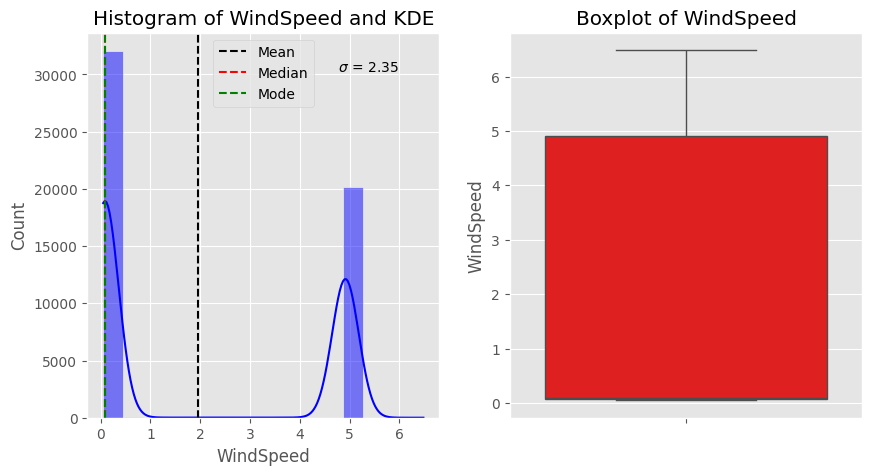

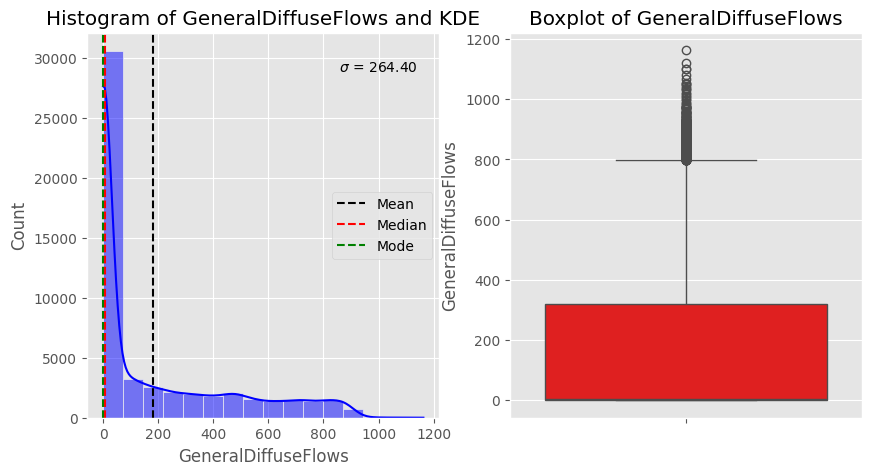

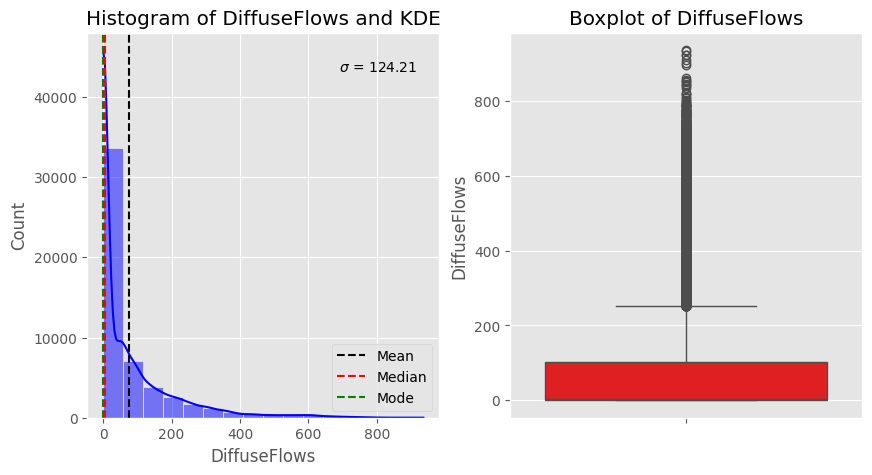

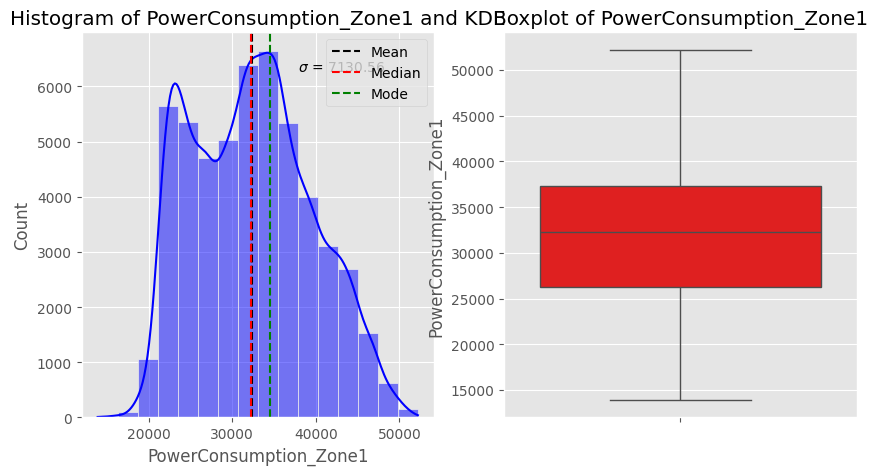

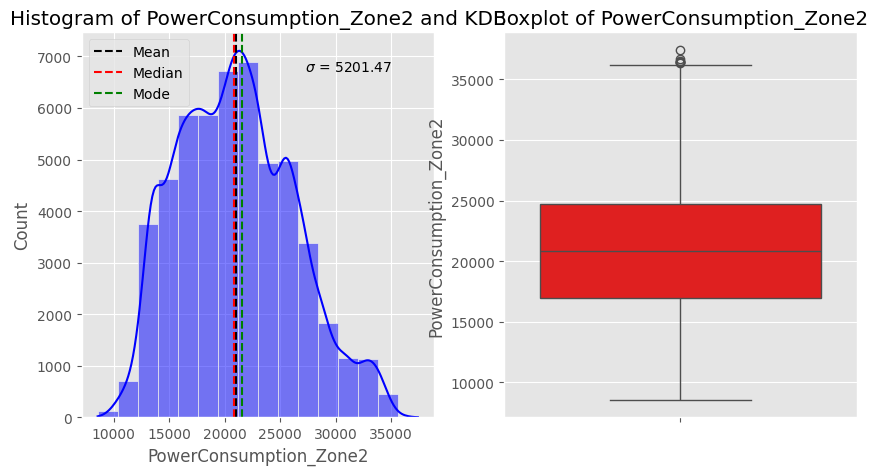

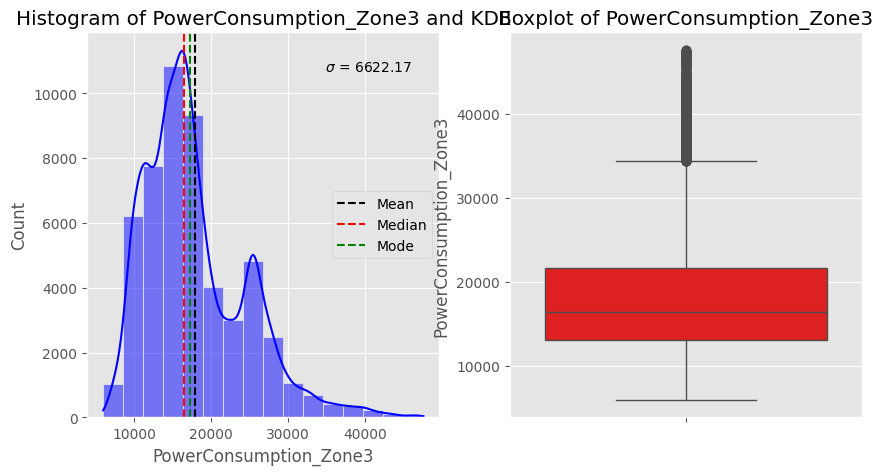

In [ ]:
df.apply(lambda x: hist_box(x, bins));

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [ ]:
print('Valores de sesgo para cada variable',df.apply(skew),sep='\n')

Valores de sesgo para cada variable
Temperature               0.196714
Humidity                 -0.625148
WindSpeed                 0.462410
GeneralDiffuseFlows       1.306936
DiffuseFlows              2.456836
PowerConsumption_Zone1    0.228857
PowerConsumption_Zone2    0.328867
PowerConsumption_Zone3    1.023842
dtype: float64


In [ ]:
print('Valores de sesgo para cada variable',df.apply(kurtosis),sep='\n')

Valores de sesgo para cada variable
Temperature              -0.303407
Humidity                 -0.121962
WindSpeed                -1.783114
GeneralDiffuseFlows       0.402615
DiffuseFlows              7.002119
PowerConsumption_Zone1   -0.754097
PowerConsumption_Zone2   -0.437470
PowerConsumption_Zone3    1.086175
dtype: float64


El análisis de distribuciones reveló que algunas variables presentan sesgo y curtosis significativos, lo que indica desviaciones de la normalidad. Los histogramas y boxplots mostraron la presencia de valores atípicos en ciertas variables, lo que puede sugerir posibles fluctuaciones inusuales en el consumo de energía

###  QQ-Plot
Los *QQ-plot* o grafica de cuantiles cuantiles es una herramienta gráfica para comparar dos distribuciones de probabilidad al graficar sus cuantiles correspondientes uno contra el otro.Un quantil Un cuantil de una muestra, $q(f)$, es un valor para el que una fracción específica $f$ de los valores de los datos es menor que o igual a $q(f)$. Para nuestro estudio es relevante comparar si cada variable sigue una distribución normal dado que la mayoría de los métodos estadísticos y de aprendizaje de maquina asumen y/o benefician que los datos siguen una distribución normal.
Formalmente un *QQ-plot normal* se define asi :

- La gráfica de cuantiles-cuantiles normales es una gráfica de $y(i)$
(observaciones ordenadas) contra $q_{0,1}(f_i)$ , donde <br> $f_i=\frac{i-3/8}{n+1/4}$ y $q_{0,1}(f)=4.91[f^{0.14}−(1-f)^{0.14}]$ <br>

Una relación cercana a una línea recta de referencia sugiere que los datos provienen de una distribución  normal

In [ ]:
from scipy.stats import norm
def qq_plot(data,distribution='normal'):
    data_sorted=np.sort(data.values)
    i=np.arange(1,len(data_sorted)+1)
    f_i=(i-(3/8))/(len(data_sorted)+(1/4))
    if distribution=='normal':
        q=norm.ppf(f_i)
        m,b=np.polyfit(q,data_sorted,1)
    fig,ax=plt.subplots(figsize=(10,5))
    ax.scatter(x=q,y=data_sorted,label='Cuantiles muestrales')
    sns.lineplot(x=q,y=(m*q)+b,ax=ax,label='linea de referencia',color='blue')
    ax.set_title(f'Q-Q plot of {data.name} and {distribution} distribution')
    ax.set_xlabel("Cuantiles teóricos")
    ax.set_ylabel("Cuantiles muestrales")
    plt.show()

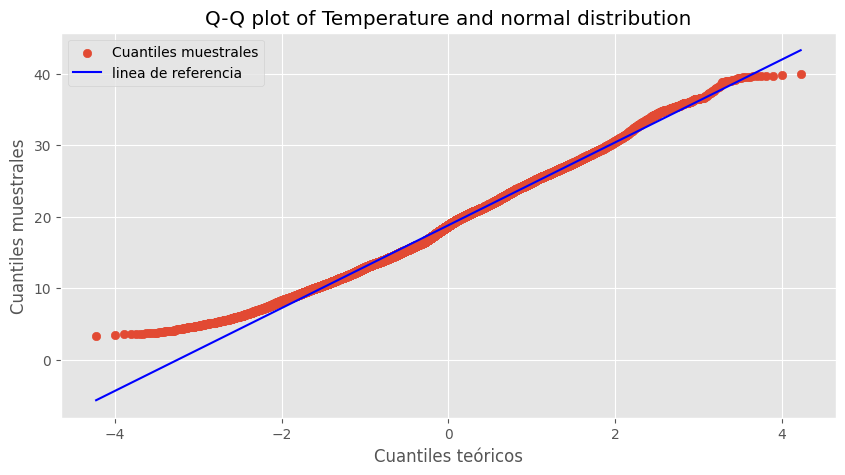

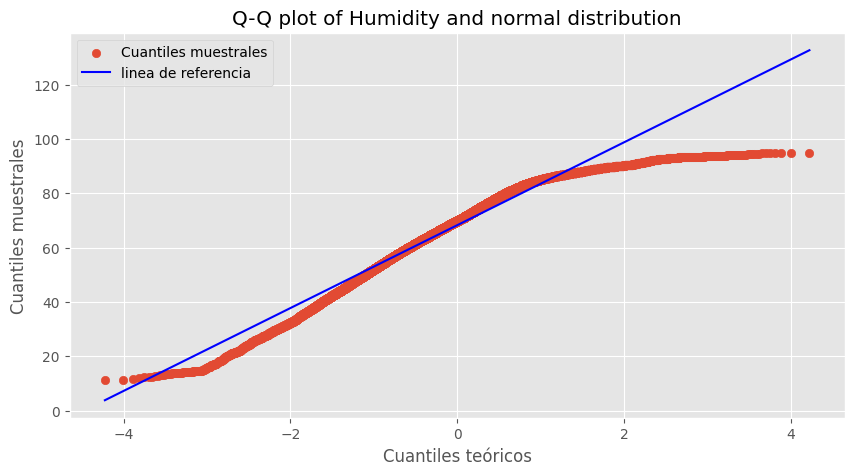

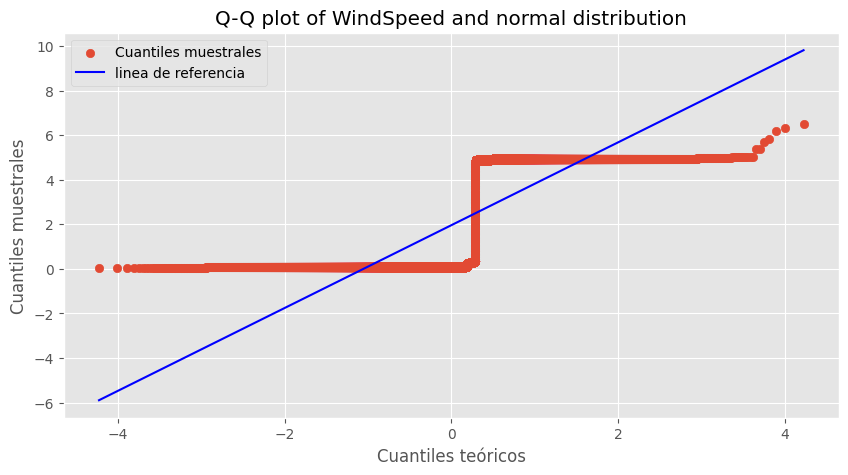

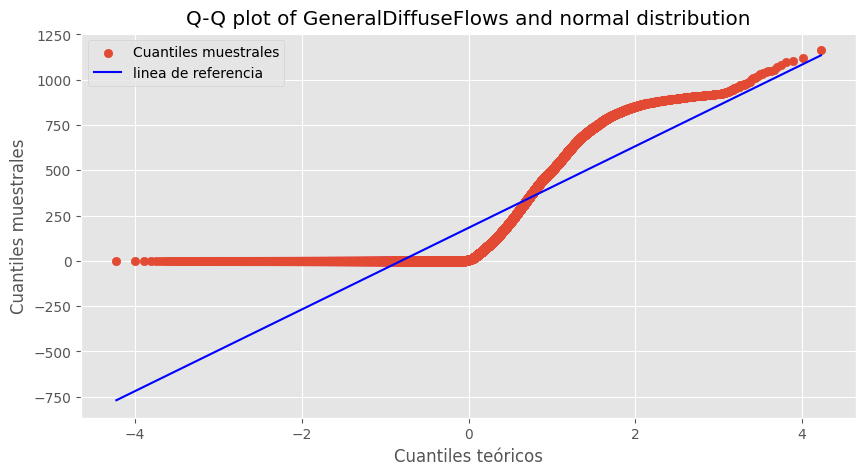

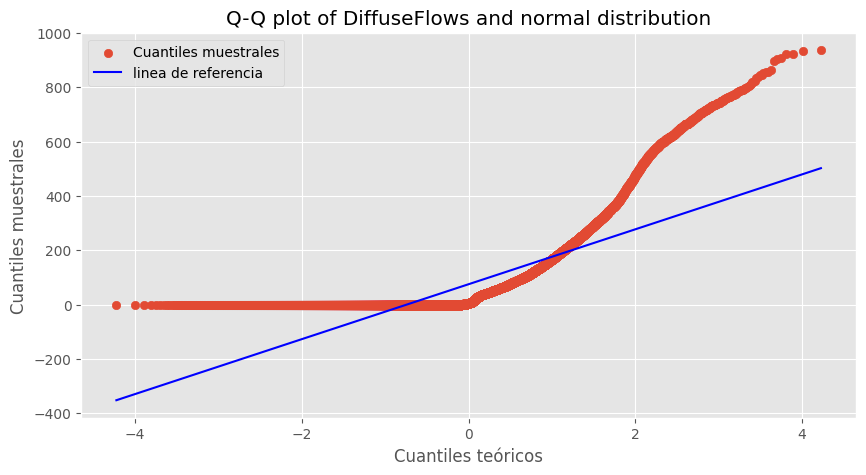

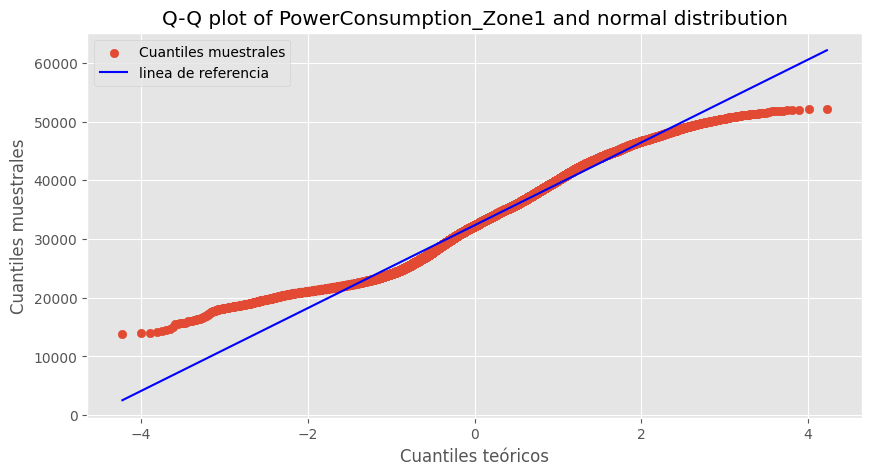

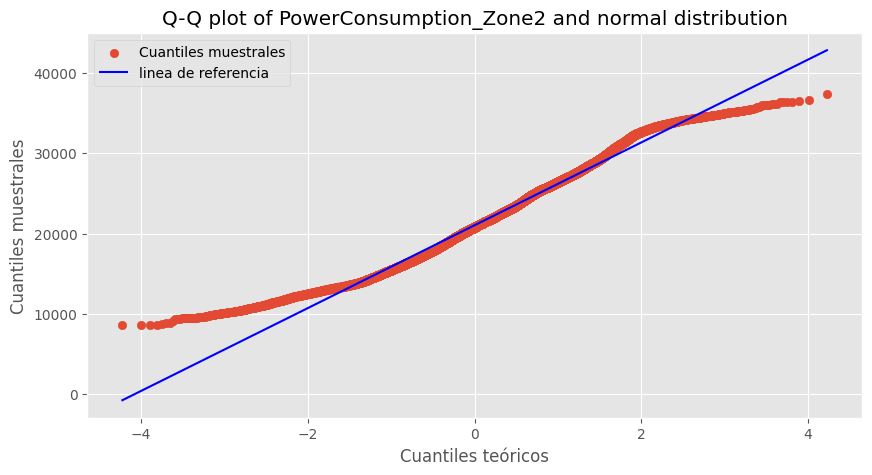

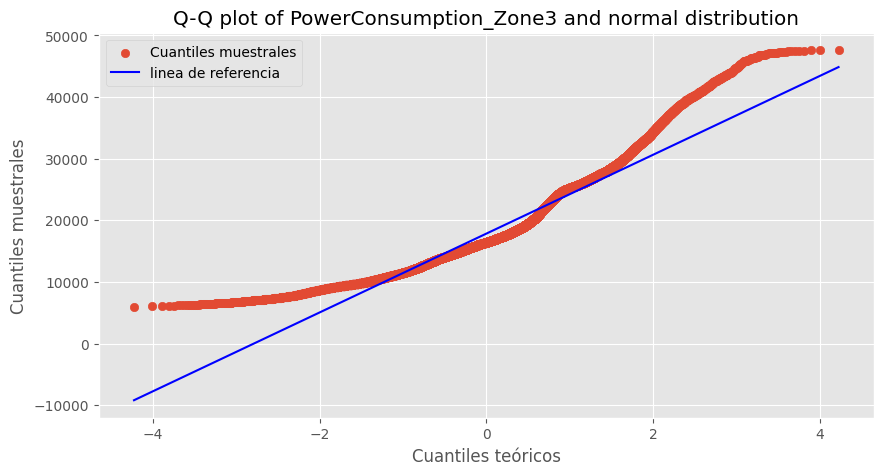

In [ ]:
df.apply(qq_plot);

Las variables de temperatura , humendad y consumo de energia electrica en las 3 zonas de Tetouan se compararan con una distribución normal y es probable que sigan una distribución normal según lo visto en el grafico *QQ-plot*.

### Descomposición de la serie de tiempo
Un mejor analisis de los datos , se puede emplear mediante la descomposition de la serie de tiempo en sus componentes principales :
- tendencia : Representa los cambios lentos que van ocurriendo en la serie de tiempo a medida que transcurre , es el componente que hace que la serie de tiempo aumente o disminuya en el tiempo.
- estacionalidad : Son los ciclos que ocurren repetidamente alrededor de una periodo de tiempo fijo
- residuales : Es todo aqueño que no se puede explicar por la tendencia y la estacionalidad , es como un error aleatorio en la serie de tiempo , tambien es conocido como ruido blanco.

Se puede expresar formalmente asi : data una serie de tiempo $y_t$ , se puede descomponer en sus componentes principales de manera aditivas asi :
 <br>$y_t = T_t + S_t + R_t$ , donde $T_t$ es la tendencia , $S_t$ es la estacionalidad y $R_t$ es el residuo.

Un primere acercamiento se puede realizar con la función ```seasonal_decompose``` de la libreria ```statsmodels``` , esta función realiza la descomposición de la serie de tiempo en sus componentes principales.

<Axes: xlabel='time'>

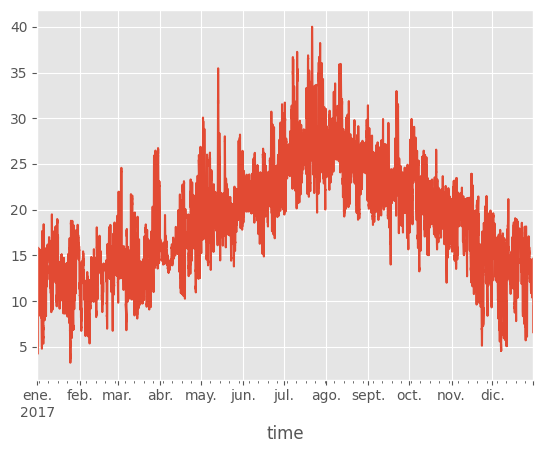

In [ ]:
df['Temperature'].plot()

In [ ]:
def descompose_time_series(data,period:int):
    decomposition=seasonal_decompose(data,model='additive',period=period)
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    fig,ax=plt.subplots(4,1,figsize=(10,10))
    data.plot(ax=ax[0],title=f'Original {data.name}',color='black')
    trend.plot(ax=ax[1],title='Trend',color='Red')
    seasonal.plot(ax=ax[2],title='Seasonal',color='Green')
    residual.plot(ax=ax[3],title='Residual',color='Blue')
    plt.tight_layout()
    plt.show()

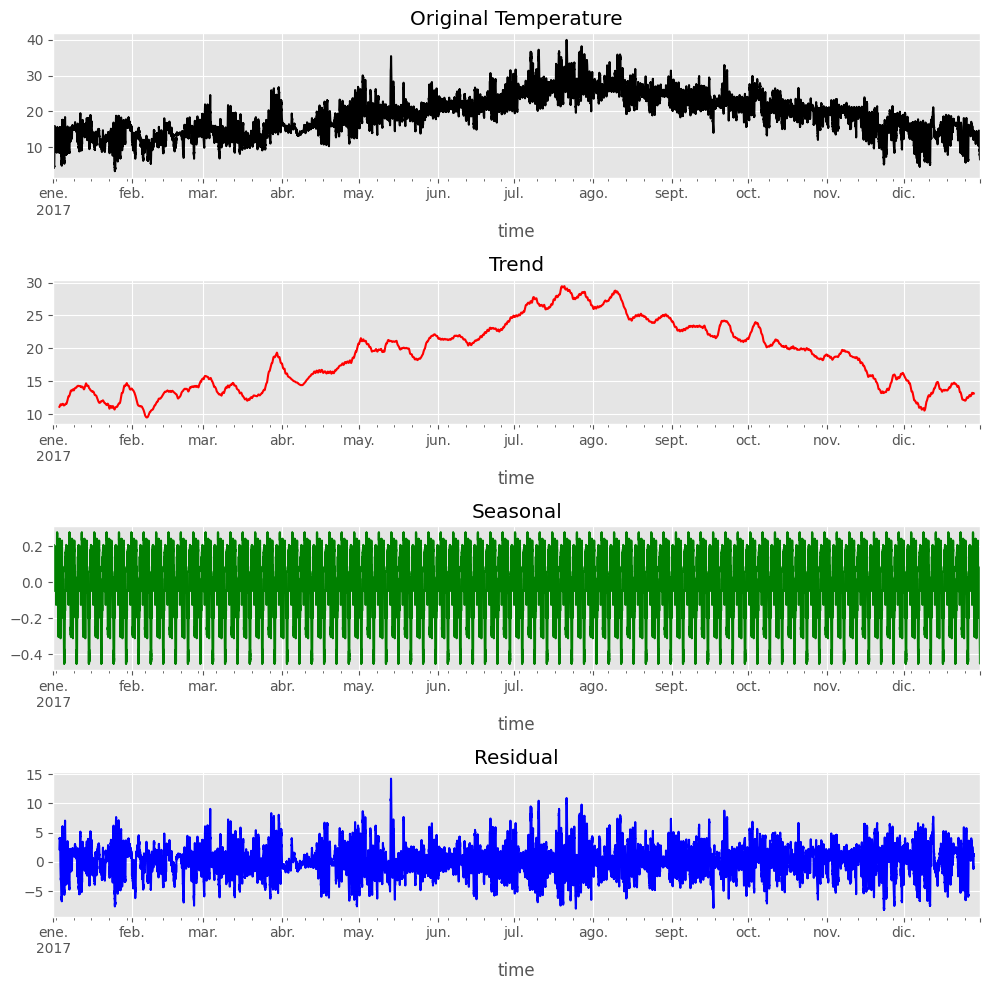

In [ ]:
descompose_time_series(df['Temperature'],period=700)

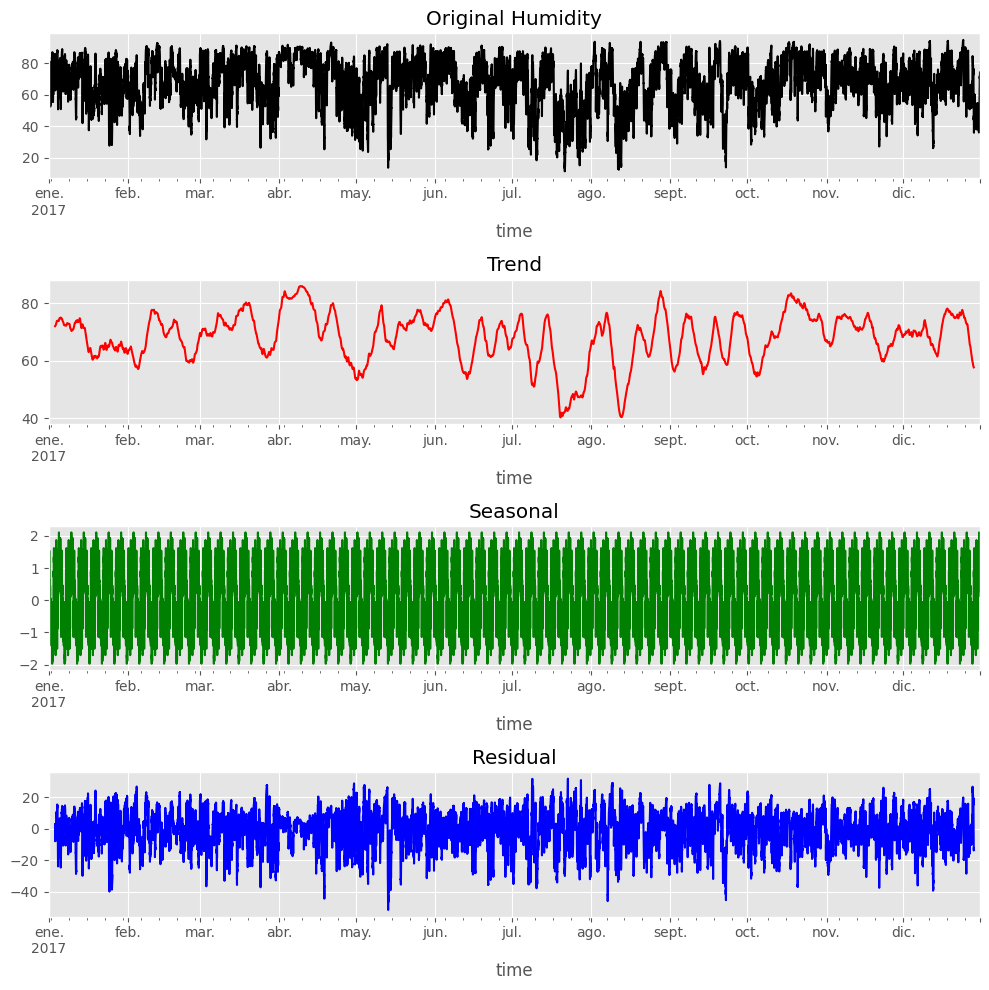

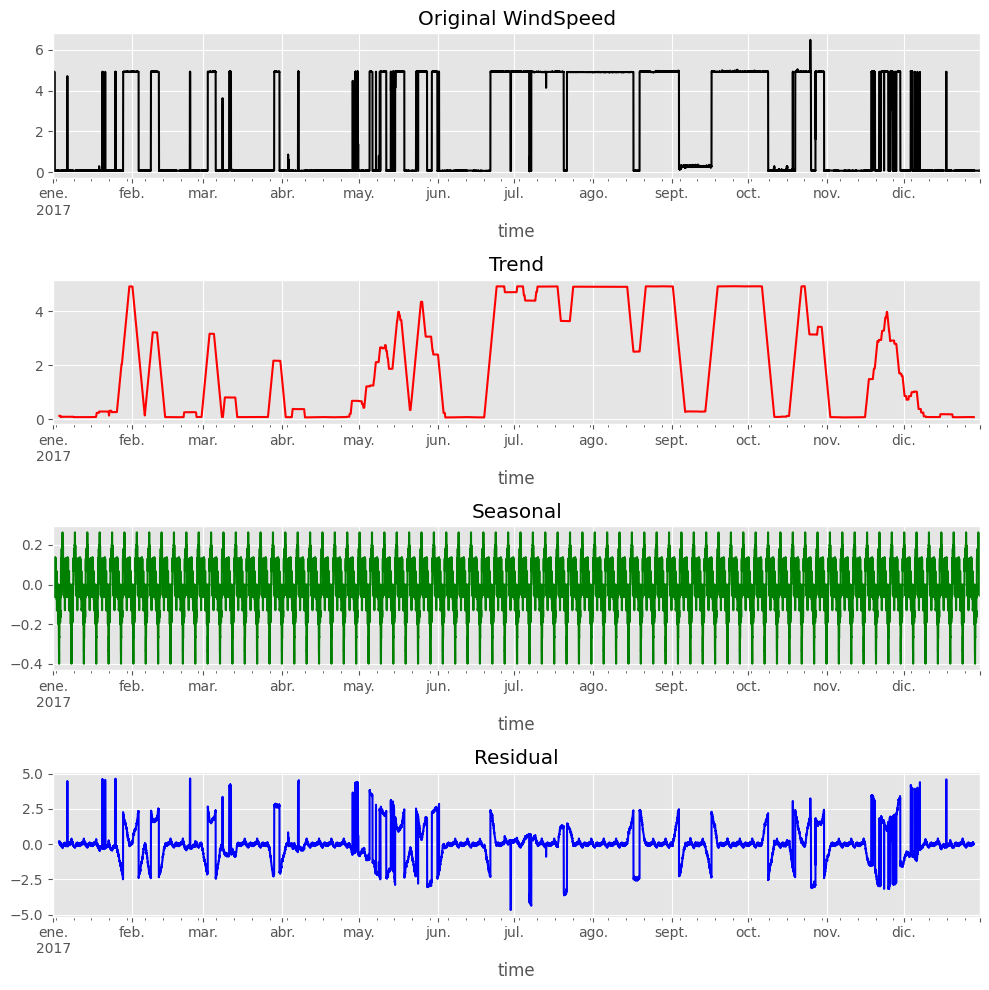

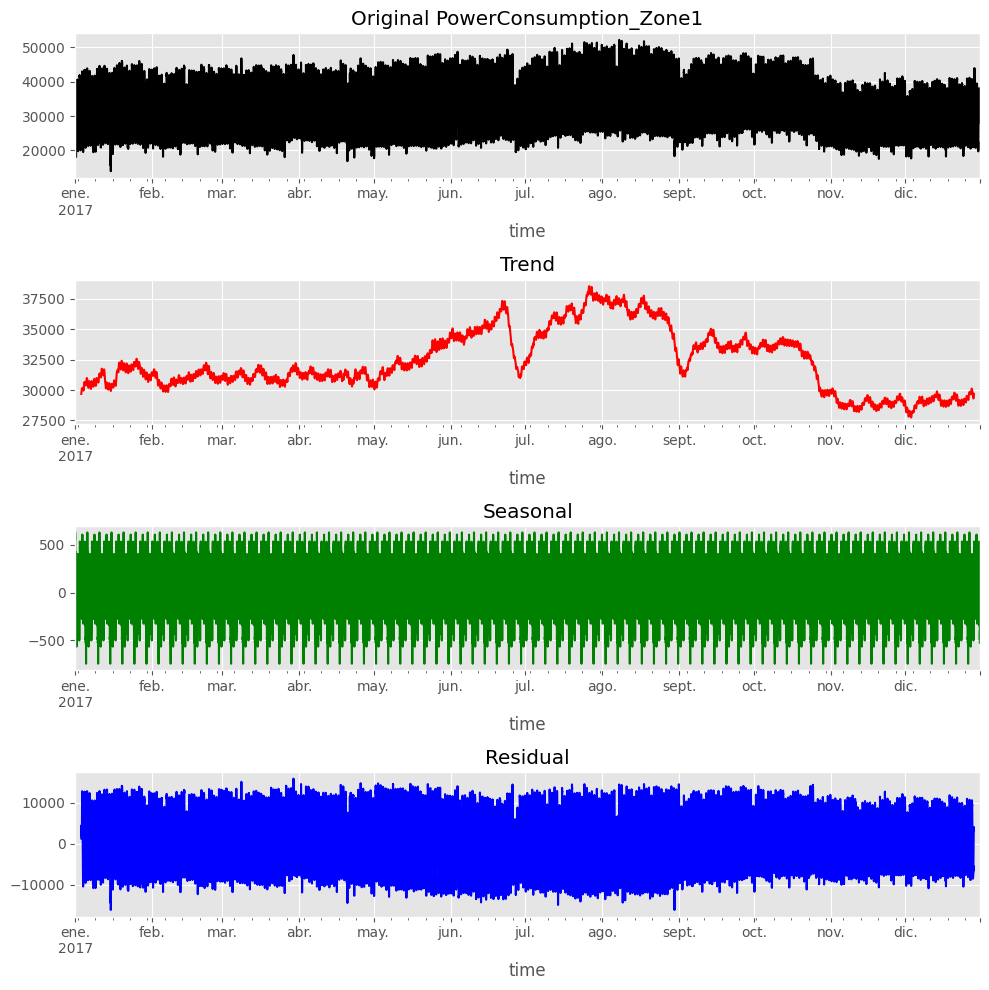

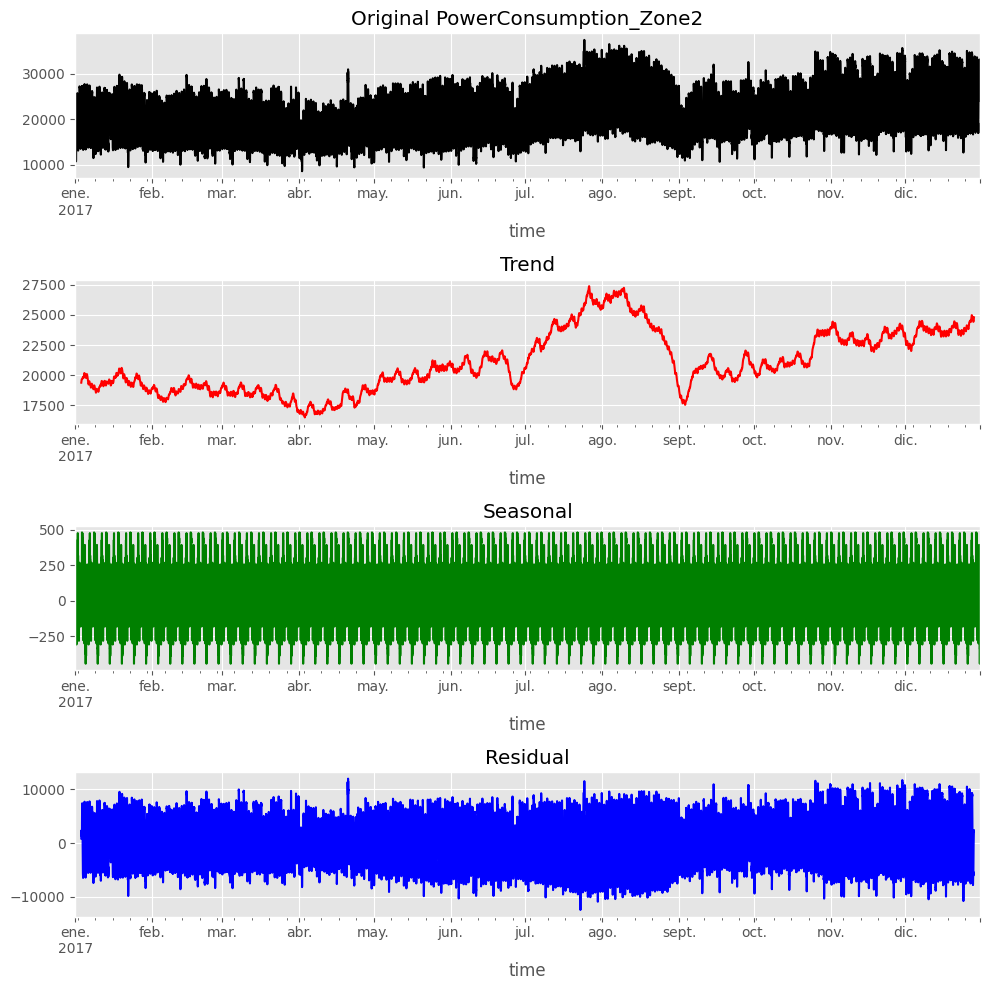

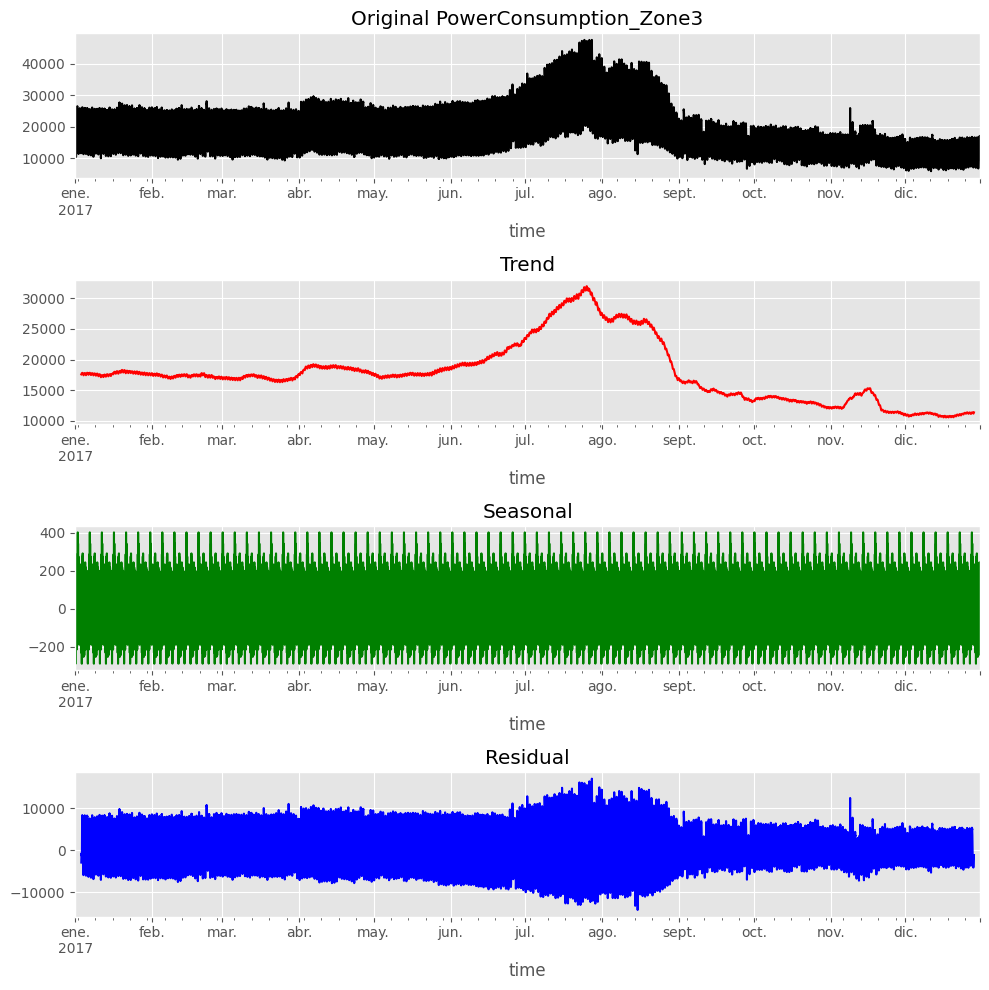

In [ ]:
df[['Humidity','WindSpeed','PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']].apply(descompose_time_series,period=700);

## 3. Variables de mayor interés para estimación

Una matriz de correlación empleando el coeficiente de correlación de Pearson para identificar las variables que tienen una mayor correlación con el consumo de energía eléctrica en las tres zonas de Tetouan , puede ser un buen indicador para seleccionar las variables de mayor interés para la estimación.

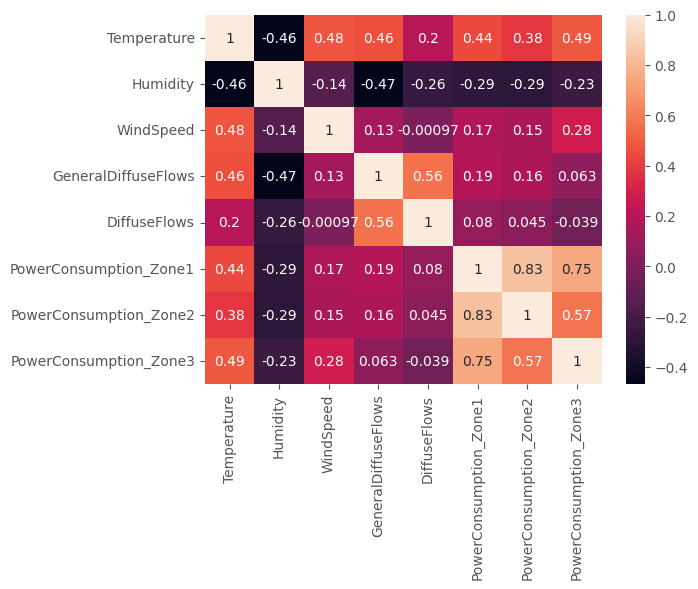

In [ ]:
matriz_correlacion=df.corr()
sns.heatmap(matriz_correlacion,annot=True)
plt.show()

## 4. Conclusión Analisis Exploratorio

En esta primera entrega del proyecto de estadística, se realizó un análisis exploratorio del conjunto de datos Electric Power Consumption, que representa el consumo eléctrico en Tetouan, Marruecos, durante 2017.

Se examinaron distribuciones y parámetros estadísticos de las variables, incluyendo medidas de tendencia central y dispersión. Además, se utilizaron histogramas y boxplots para visualizar la distribución de los datos y detectar posibles anomalías. La descomposición de la serie de tiempo permitió identificar patrones de tendencia y estacionalidad en el consumo de energía.

Habiendo realizado este análisis preliminar podemos entender la naturaleza de los datos en el dataset. A partir de esto se espera aplicar modelos predictivos o técnicas avanzadas para entender mejor las fluctuaciones en el consumo eléctrico y sus posibles factores determinantes.


## 5. Analisis de la serie de tiempo

Antes de pasar al analisis es necesario realizar algunas transformaciones en los datos para facilitar el analisis de la serie de tiempo.

In [ ]:
columns=df.columns

In [ ]:
df['year']=df.index.year
df['month']=df.index.month
df['day']=df.index.day
df['hour']=df.index.hour
df['minute']=df.index.minute
df['dayofweek']=df.index.dayofweek+1

In [ ]:
df.describe()

Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000            52416.000000   
mean      75.028022            32344.970564            21042.509082   
std      124.210949             7130.562564             5201.465892   
min        0.011000            13895.696200             8560.081466   
25%        0.122000            26310.668692            16980.766032   
50%        4.456000            32265.920340            20823.168405   
75%      101.000000            37309.018185            24713.717520   
max      936.000000            52204.395120            37408.860760   

       PowerConsumption_Zone3     year         month           day  \
count            52416.000000  52416.0  52416.000000  52416.000000   
mean             17835.406218   2017.0      6.510989     15.678571   
std               6622.165099      0.0      3.440642      8.771822   
min               5935.174070   2017.0      1.000000      1.000000   
25%              13129.326630   2017.0      4.000000      8.000000   
50%              16415.117470   2017.0      7.000000     16.000000   
75%              21624.100420   2017.0      9.250000     23.000000   
max              47598.326360   2017.0     12.000000     31.000000   

               hour        minute     dayofweek  
count  52416.000000  52416.000000  52416.000000  
mean      11.500000     25.000000      4.000000  
std        6.922253     17.078414      2.000019  
min        0.000000      0.000000      1.000000  
25%        5.750000     10.000000      2.000000  
50%       11.500000     25.000000      4.000000  
75%       17.250000     40.000000      6.000000  
max       23.000000     50.000000      7.000000

Ahora se presenta un analisis mas formal de los datos.
El primer paso es revisar graficamente cada una de las variables en el tiempo de manera separada,  para identificar patrones y comportamientos en los datos

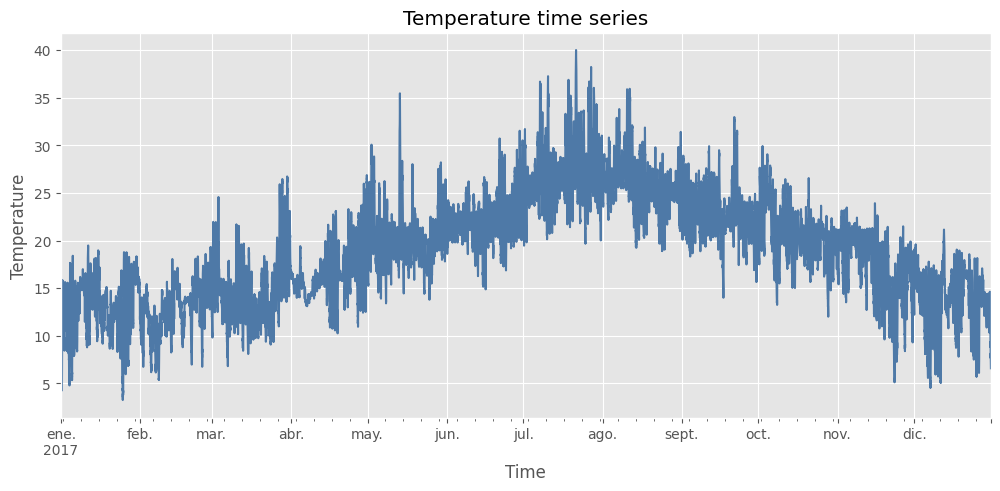

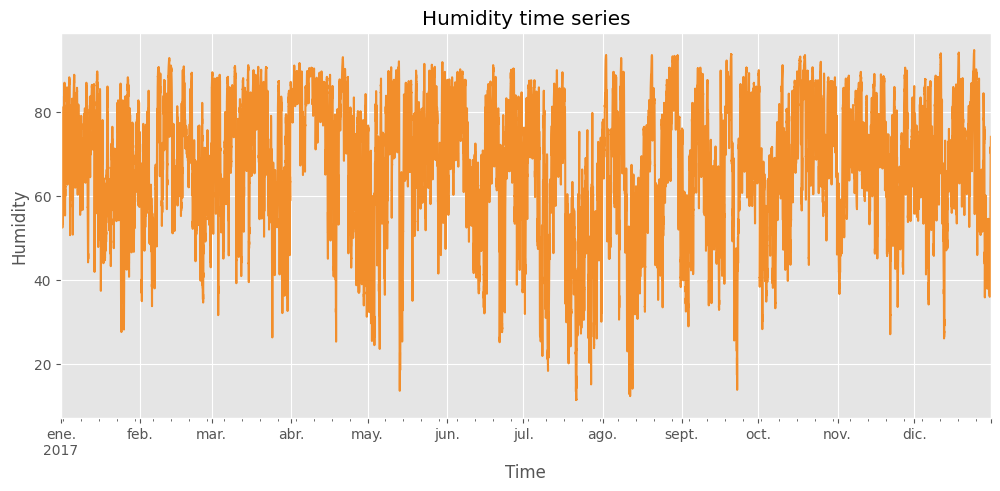

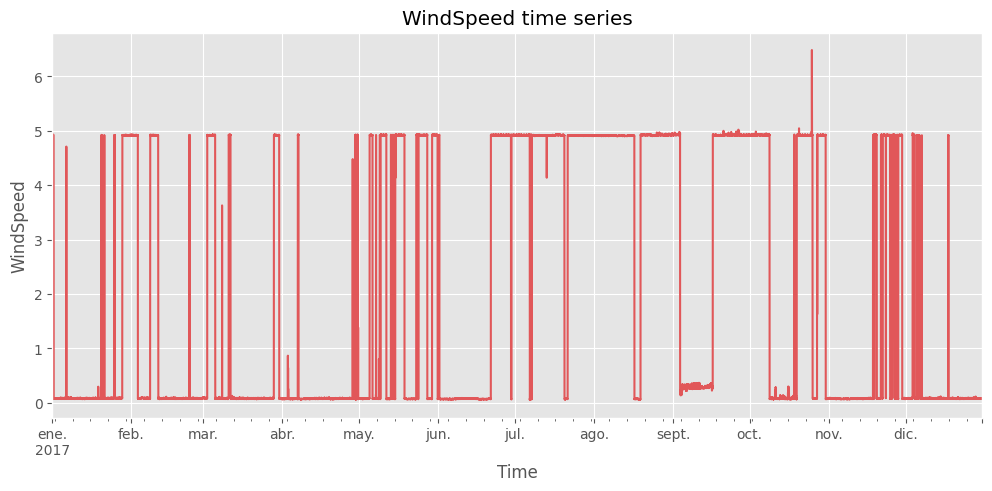

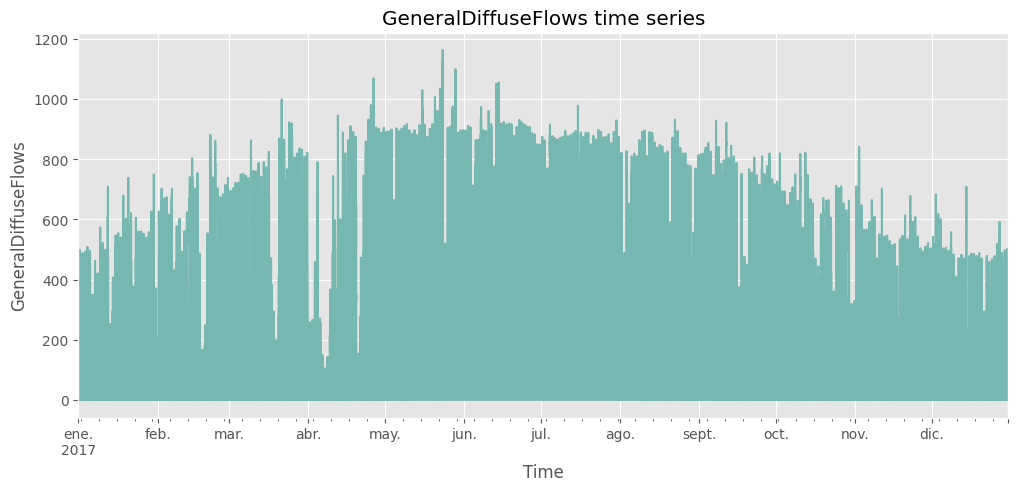

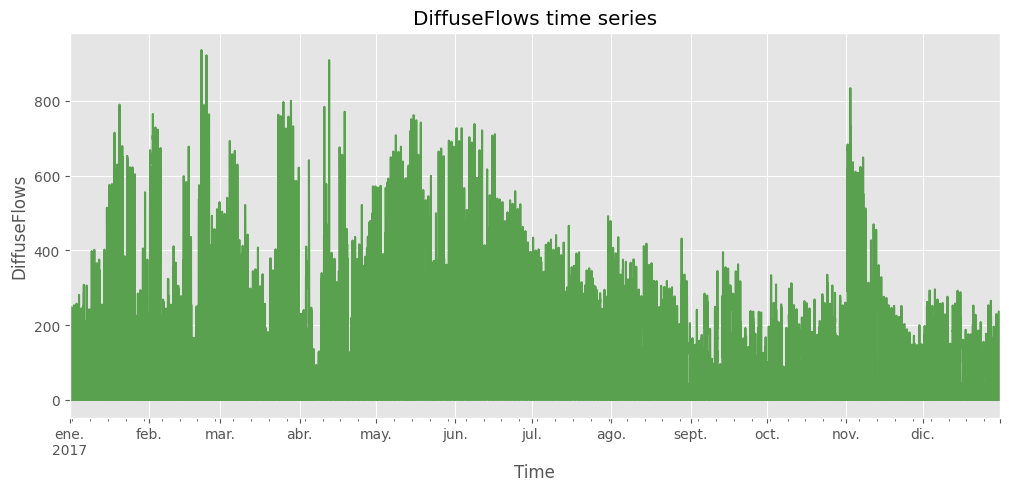

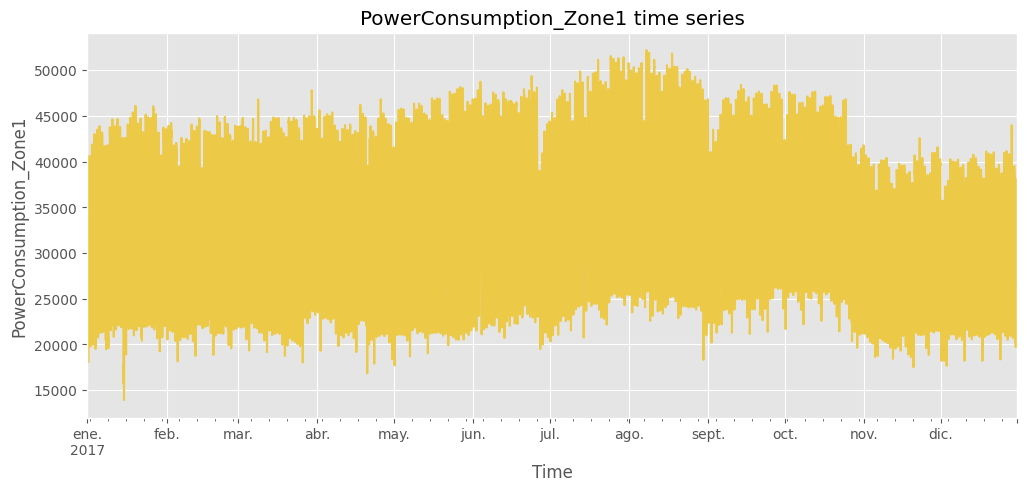

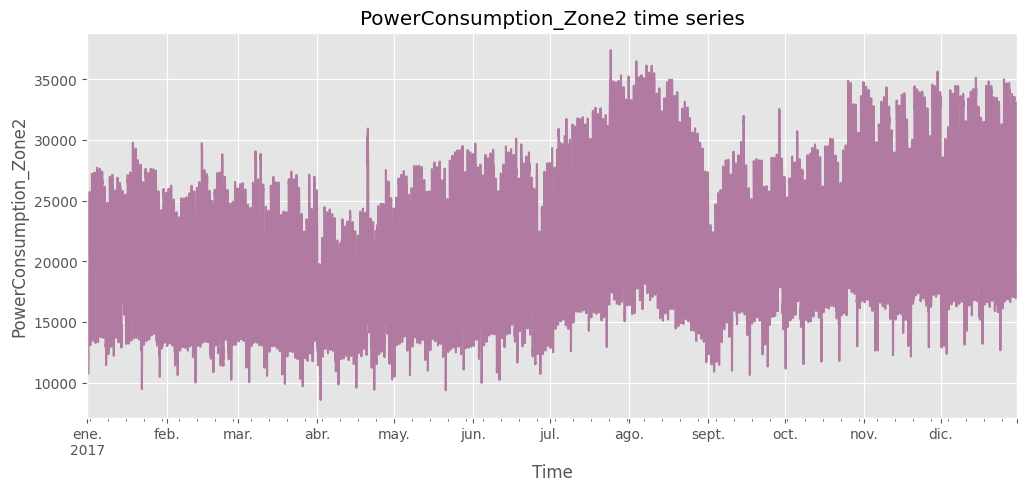

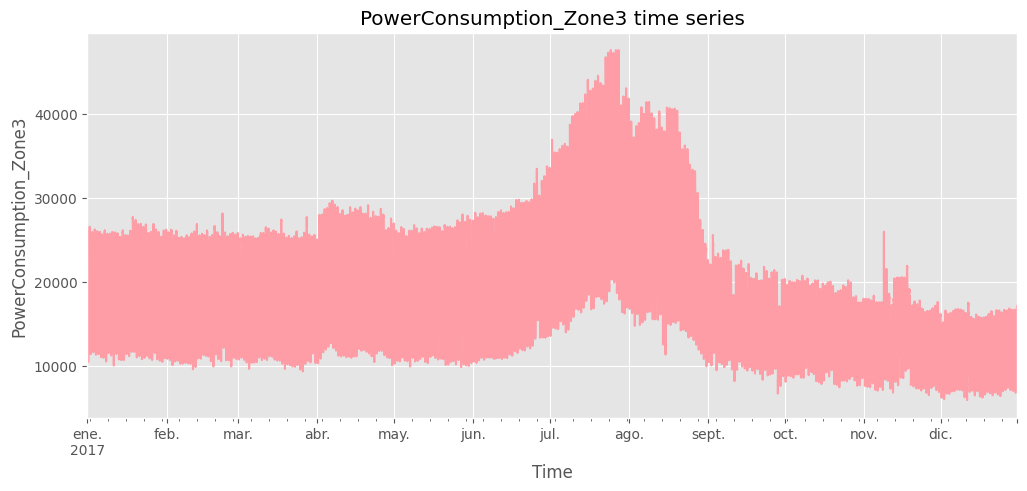

In [ ]:
colors=["#4E79A7","#F28E2B","#E15759","#76B7B2","#59A14F","#EDC948","#B07AA1","#FF9DA7","#9C755F"]
for column,item in zip(columns,colors):
    df[column].plot(figsize=(12,5),color=item)
    plt.title(f'{column} time series')
    plt.ylabel(column)
    plt.xlabel('Time')
    plt.show()

Actividad
Presentacion de 3 preguntas de intervalos de confianza basados en los
datos que eligieron para su proyecto final.
La presentacion sera el 26 de Marzo en la hora de clase.
Tiempo de la presentacion: 10 minuntos.
Esquema propuesto:
- Explicacion breve del dataset.
- Breve analisis de los datos suceptibles de estadistica.
- Las 3 preguntas para intervalos de confianza.

## 6.Intervalos de Confianza

### 6.1Intervalo de confianza para el consumo medio de energía durante el día y la noche

In [ ]:
# Calculo de los intervalos de confianza de la media del consumo electrico por zona teniendo en cuenta las estaciones del ano y si es de dia u noche
estaciones = {
    'primavera': df[(df['month'] > 3) & (df['month'] < 7)],
    'verano': df[(df['month'] > 6) & (df['month'] < 10)],
    'otono': df[(df['month'] > 9) & (df['month'] <= 12)],
    'invierno': df[(df['month'] >= 1) & (df['month'] < 4)]
}

# Definir períodos de día y noche con rangos corregidos
periodos = {
    'primavera': {
        'dia': lambda df: df[(df['hour'] > 5) & (df['hour'] < 19)],
        'noche': lambda df: df[(df['hour'] >= 19) | (df['hour'] <= 5)]
    },
    'verano': {
        'dia': lambda df: df[(df['hour'] > 5) & (df['hour'] < 20)],
        'noche': lambda df: df[(df['hour'] >= 20) | (df['hour'] <= 5)]
    },
    'otono': {
        'dia': lambda df: df[(df['hour'] > 5) & (df['hour'] < 19)],
        'noche': lambda df: df[(df['hour'] >= 19) | (df['hour'] <= 5)]
    },
    'invierno': {
        'dia': lambda df: df[(df['hour'] > 7) & (df['hour'] < 19)],
        'noche': lambda df: df[(df['hour'] >= 19) | (df['hour'] <= 7)]
    }
}

# Definir zonas de consumo
zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

# Nivel de confianza
confianza = 0.99

# Diccionario para almacenar los intervalos de confianza
intervalos_confianza = {}

# Iterar sobre estaciones y períodos (día/noche)
for estacion, df_estacion in estaciones.items():
    intervalos_confianza[estacion] = {}

    for periodo, filtro in periodos[estacion].items():
        df_periodo = filtro(df_estacion)  # Filtrar por día o noche

        intervalos_confianza[estacion][periodo] = {}

        for zone in zones:
            data = df_periodo[zone].dropna()  # Eliminar valores nulos
            n = len(data)  # Tamaño de la muestra

            if n > 1:  # Evitar errores con muestras vacías o de tamaño 1
                media = np.mean(data)
                std_error = stats.sem(data)  # Error estándar

                # Calcular intervalo de confianza con t-student
                intervalo = stats.t.interval(confianza, df=n-1, loc=media, scale=std_error)
            else:
                intervalo = (None, None)  # Si no hay datos suficientes, asignar None

            intervalos_confianza[estacion][periodo][zone] = intervalo

# Mostrar resultados
for estacion, periodos in intervalos_confianza.items():
    for periodo, zonas in periodos.items():
        print(f"\n{estacion.upper()} - {periodo.upper()}")
        for zone, intervalo in zonas.items():
            print(f"{zone}: {intervalo}")


PRIMAVERA - DIA
PowerConsumption_Zone1: (31324.316000466133, 31623.12053694159)
PowerConsumption_Zone2: (18845.938434571977, 19052.993895077216)
PowerConsumption_Zone3: (16671.88198046594, 16866.25597768537)

PRIMAVERA - NOCHE
PowerConsumption_Zone1: (33904.74747098784, 34481.75527158625)
PowerConsumption_Zone2: (19831.539172862816, 20179.266233403578)
PowerConsumption_Zone3: (21162.43244664632, 21534.169235643723)

VERANO - DIA
PowerConsumption_Zone1: (35215.21376444199, 35565.77319124125)
PowerConsumption_Zone2: (23191.46284483545, 23468.811071274795)
PowerConsumption_Zone3: (21540.59061316344, 21969.96204172657)

VERANO - NOCHE
PowerConsumption_Zone1: (34748.31322212007, 35314.97361194877)
PowerConsumption_Zone2: (22398.868259256185, 22798.84435978367)
PowerConsumption_Zone3: (23646.64175482979, 24263.82701207058)

OTONO - DIA
PowerConsumption_Zone1: (30592.585665393864, 30931.674918209963)
PowerConsumption_Zone2: (23000.58325969796, 23283.77948119807)
PowerConsumption_Zone3: (1145

In [ ]:
#  Calculo de los intervalos de confianza siendo mas general
dia = df[(df['hour']>6) & (df['hour']<20)] # En general el sol sale a las 7 a.m y se pone a las 7 p.m (19:00)
noche=  df[(df['hour']<=6) | (df['hour']>=20)]

zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

confianza = 0.99

intervalos_dia = {}
for zone in zones:
    data = dia[zone].dropna()  # Eliminar valores nulos
    n = len(data)  # Tamaño de la muestra
    media = np.mean(data)
    std_error = stats.sem(data)  # Error estándar

    # Usar t-student si n es pequeño, normal si n es grande
    intervalo = stats.t.interval(confianza, df=n-1, loc=media, scale=std_error)

    intervalos_dia[zone] = intervalo

intervalos_noche = {}
for zone in zones:
    data = noche[zone].dropna()  # Eliminar valores nulos
    n = len(data)  # Tamaño de la muestra
    media = np.mean(data)
    std_error = stats.sem(data)  # Error estándar

    # Usar t-student si n es pequeño, normal si n es grande
    intervalo = stats.t.interval(confianza, df=n-1, loc=media, scale=std_error)

    intervalos_noche[zone] = intervalo

print('Intervalos de confianza del consumo de energia por zona en el dia')
for zone, intervalo in intervalos_dia.items():
    print(f"{zone}: Media = {np.mean(dia[zone]):.2f}, Intervalo de confianza al 99% = {intervalo}")

print('Intervalos de confianza del consumo de energia por zona en la noche')
for zone, intervalo in intervalos_noche.items():
    print(f"{zone}: Media = {np.mean(noche[zone]):.2f}, Intervalo de confianza al 99% = {intervalo}")


Intervalos de confianza del consumo de energia por zona en el dia
PowerConsumption_Zone1: Media = 33544.13, Intervalo de confianza al 99% = (33456.98803739811, 33631.27003891422)
PowerConsumption_Zone2: Media = 22007.88, Intervalo de confianza al 99% = (21938.09851978158, 22077.6549124325)
PowerConsumption_Zone3: Media = 17344.40, Intervalo de confianza al 99% = (17251.375293658613, 17437.41908102461)
Intervalos de confianza del consumo de energia por zona en la noche
PowerConsumption_Zone1: Media = 30927.78, Intervalo de confianza al 99% = (30789.896564244875, 31065.669986670044)
PowerConsumption_Zone2: Media = 19901.62, Intervalo de confianza al 99% = (19807.592746923376, 19995.647374227145)
PowerConsumption_Zone3: Media = 18415.69, Intervalo de confianza al 99% = (18296.645329432034, 18534.73390794975)


### 6.2 Intervalo de confianza para la diferencia entre el consumo medio en la semana laboral y el fin de semana

In [ ]:
from scipy.stats import t
from scipy.stats import norm
import math
workday=df['dayofweek']<=5
weekend=df['dayofweek']>5
columns=['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']
confidence=0.98
a=1-confidence
for elem in columns:
    v1=df[workday][elem]
    v2=df[weekend][elem]
    x1=v1.mean()
    x2=v2.mean()
    print(f'La media de {elem} en dias laborales es {x1:.2f} y en fines de semana es {x2:.2f} y su diferencia es {x1-x2:.2f}')
    n1=len(v1)
    n2=len(v2)
    s1=v1.std(ddof=1)
    s2=v2.std(ddof=1)
    v=math.floor((s1**2/n1+s2**2/n2)**2/(((s1**2/n1)**2/(n1-1))+((s2**2/n2)**2/(n2-1))))
    t_val=t.ppf(1-(a/2),v)
    lower=(x1-x2)-t_val*np.sqrt(s1**2/n1+s2**2/n2)
    upper=(x1-x2)+t_val*np.sqrt(s1**2/n1+s2**2/n2)
    print(f'El intervalo de confianza del {int(confidence*100)}% para la diferencia de medias de {elem} entre dias laborales y fines de semana es ({lower:.2f},{upper:.2f})')

La media de PowerConsumption_Zone1 en dias laborales es 32676.34 y en fines de semana es 31516.56 y su diferencia es 1159.78
El intervalo de confianza del 98% para la diferencia de medias de PowerConsumption_Zone1 entre dias laborales y fines de semana es (1000.14,1319.42)
La media de PowerConsumption_Zone2 en dias laborales es 21546.45 y en fines de semana es 19782.67 y su diferencia es 1763.78
El intervalo de confianza del 98% para la diferencia de medias de PowerConsumption_Zone2 entre dias laborales y fines de semana es (1648.39,1879.17)
La media de PowerConsumption_Zone3 en dias laborales es 17776.37 y en fines de semana es 17983.01 y su diferencia es -206.64
El intervalo de confianza del 98% para la diferencia de medias de PowerConsumption_Zone3 entre dias laborales y fines de semana es (-356.71,-56.58)


### 6.3 Intervalo de confianza para el coeficiente de correlación entre la temperatura y el consumo de energía

In [ ]:
confidence=0.98
a=1-confidence
for elem in columns:
    s1=df[elem].std()
    s2=df['Temperature'].std()
    cova=df[elem].cov(df['Temperature'])
    rho=cova/(s1*s2)
    n=len(df[elem])
    z=0.5*np.log((1+rho)/(1-rho))
    n_val=norm.ppf(1-(a/2))
    lower_z=z-n_val/(np.sqrt(n-3))
    upper_z=z+n_val/(np.sqrt(n-3))
    print(f'El coeficiente de correlacion entre {elem} y la temperatura es {rho:.2f}')
    upper=(np.exp(2*upper_z)-1)/(np.exp(2*upper_z)+1)
    lower=(np.exp(2*lower_z)-1)/(np.exp(2*lower_z)+1)
    print(f'El intervalo de confianza del {int(confidence*100)}% para la correlacion entre {elem} y la temperatura es ({lower:.2f},{upper:.2f})')

El coeficiente de correlacion entre PowerConsumption_Zone1 y la temperatura es 0.44
El intervalo de confianza del 98% para la correlacion entre PowerConsumption_Zone1 y la temperatura es (0.43,0.45)
El coeficiente de correlacion entre PowerConsumption_Zone2 y la temperatura es 0.38
El intervalo de confianza del 98% para la correlacion entre PowerConsumption_Zone2 y la temperatura es (0.37,0.39)
El coeficiente de correlacion entre PowerConsumption_Zone3 y la temperatura es 0.49
El intervalo de confianza del 98% para la correlacion entre PowerConsumption_Zone3 y la temperatura es (0.48,0.50)


## 7. Regresión Lineal

### Función de regresión

In [55]:
## Función para calcular la recta de regresion con minimos cuadrados
def least_square_regression(x, y):
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")
    n = len(x)
    xy = x*y
    x2 = x**2
    b = (n*np.sum(xy) - np.sum(x)*np.sum(y)) / (n*np.sum(x2) - np.sum(x)**2)
    a = np.mean(y) - b*np.mean(x)
    return a, b


## Funcion para graficar la regresion de una muestra y de la poblacion
def plot_regression(df, x:str, y:str, n:int=0, random_state:int=0):

    # Pendiente y punto de corte
    b0, b1 = least_square_regression(df[x], df[y])
    X = np.linspace(df[x].min()-5, df[x].max()+5)
    Y = b0 + b1*X

    if n != 0:
      sample = df[[x, y]].sample(n=n, random_state=random_state)
      # Pendiente y punto de corte para la muestra
      sam_a, sam_b = least_square_regression(sample[x].values, sample[y].values)
      sam_y = sam_a + sam_b*X

      ## Graficar
      plt.scatter(sample[x].values, sample[y].values, color='b')
      plt.plot(X, Y, color='r', linestyle='--', linewidth=2, label=f'y={b0:.2f}+{b1:.2f}*x')# Grafica de regresion de la poblacion
      plt.plot(X, sam_y, color='orange', linestyle='--', linewidth=2, label=f'y={sam_a:.2f}+{sam_b:.2f}*x') # Grafica de regresion de la muestra
      plt.title(f'Funcion de regresion para {y}')
      plt.xlabel(x)
      plt.ylabel(y)
      plt.legend()
      plt.show()
      return b1,b0
    else:
      plt.scatter(df[x], df[y], color='b')
      plt.plot(X, Y, color='r', linestyle='--', linewidth=3)
      plt.xlabel(x)
      plt.ylabel(y)
      plt.title(f'Funcion de regresion para {y}')
      plt.show()
      return b1,b0

### 7.1 Regresion con respecto a la Temperatura

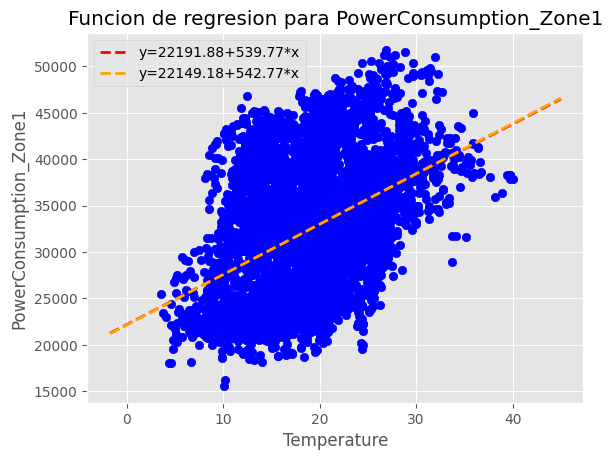

In [56]:
# Calculo de y grafica de la pendiente
sample_shape = 5000
random_seed = 27
b1,b0=plot_regression(df, 'Temperature', 'PowerConsumption_Zone1', sample_shape, random_seed)

In [44]:
r2_score(df['PowerConsumption_Zone1'], b0 + b1*df['Temperature'].values)

0.19379434309343935

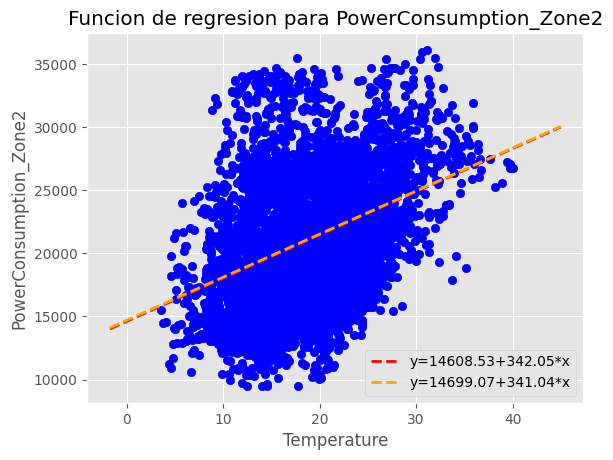

In [47]:
#@title PowerConsumption_Zone2

# Calculo de y grafica de la pendiente
sample_shape = 5000 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
b1,b0=plot_regression(df, 'Temperature', 'PowerConsumption_Zone2', sample_shape, random_seed)

In [50]:
r2_score(df['PowerConsumption_Zone2'], b0 + b1*df['Temperature'].values)

0.14625125663489114

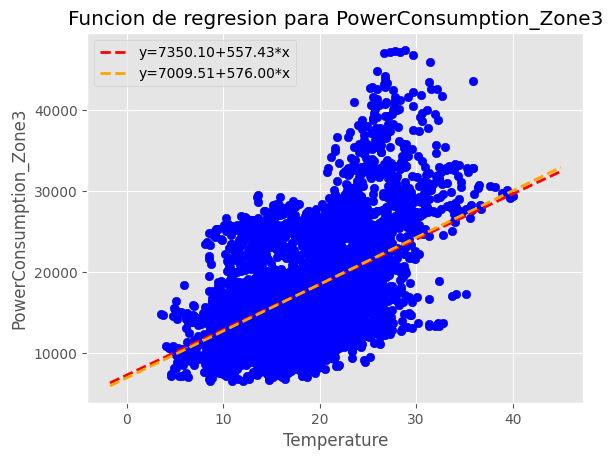

In [ ]:
#@title PowerConsumption_Zone3

# Calculo de y grafica de la pendiente
sample_shape = 5000 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
b1,b0=plot_regression(df, 'Temperature', 'PowerConsumption_Zone3', sample_shape, random_seed)

In [51]:
r2_score(df['PowerConsumption_Zone3'], b0 + b1*df['Temperature'].values)

-0.030687784802700735

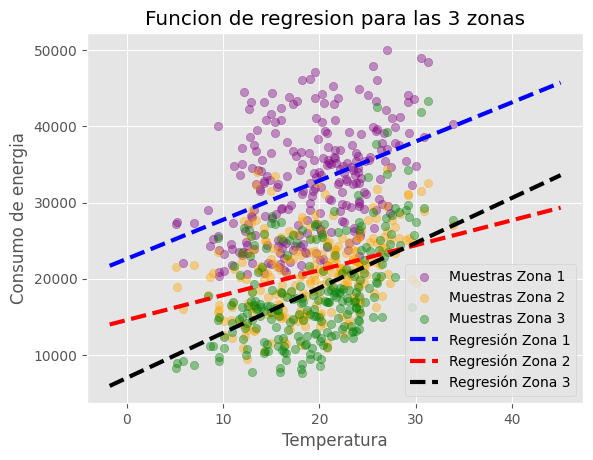

In [ ]:
#@title PowerConsumption_zone1, PowerConsumption_zone2, PowerConsumption_zone3

# Datos
sample_shape = 250 #@param {type:"integer"}
sample = df[['Temperature', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].sample(n=sample_shape, random_state=27)
X = sample['Temperature'].values
Y1 = sample['PowerConsumption_Zone1'].values
Y2 = sample['PowerConsumption_Zone2'].values
Y3 = sample['PowerConsumption_Zone3'].values

# Pendiente y punto de corte
sam_a1, sam_b1 = least_square_regression(X, Y1) # Muestra de la zona 1
sam_a2, sam_b2 = least_square_regression(X, Y2) # Muestra de la zona 1
sam_a3, sam_b3 = least_square_regression(X, Y3) # Muestra de la zona 1

# Funcion de regresion para zona 1 con respecto a la energia
x = np.linspace(df['Temperature'].min() - 5, df['Temperature'].max() + 5)
sam_y1 = sam_a1 + sam_b1*x # Función de regresión para la zona 1
sam_y2 = sam_a2 + sam_b2*x # Función de regresión para la zona 2
sam_y3 = sam_a3 + sam_b3*x # Función de regresión para la zona 3

# Grafica de los puntos y la función
plt.scatter(X, Y1, color=('purple',0.4), label='Muestras Zona 1')
plt.scatter(X, Y2, color=('orange',0.4), label='Muestras Zona 2')
plt.scatter(X, Y3, color=('green',0.4), label='Muestras Zona 3')
plt.plot(x, sam_y1, color='blue', linestyle='--', linewidth=3, label='Regresión Zona 1') # Grafica de regresion de la zona 1
plt.plot(x, sam_y2, color='red', linestyle='--', linewidth=3, label='Regresión Zona 2') # Grafica de regresion de la Zona 2
plt.plot(x, sam_y3, color='k', linestyle='--', linewidth=3, label='Regresión Zona 3') # Grafica de regresion de la Zona 3
plt.title('Funcion de regresion para las 3 zonas')
plt.xlabel('Temperatura')
plt.ylabel('Consumo de energia')
plt.legend()
plt.show()

### 7.2 Regresión con respecto a la Humedad

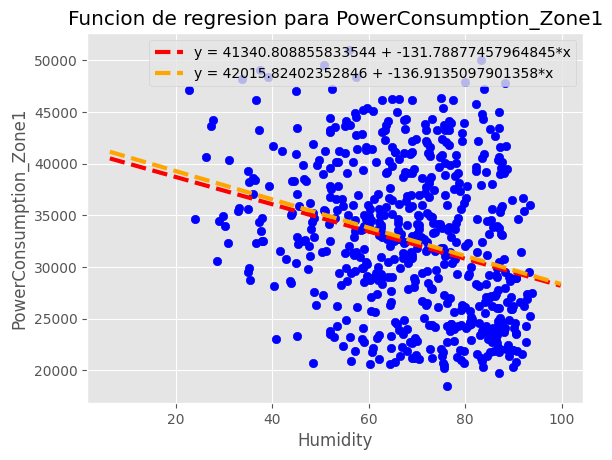

0

In [ ]:
#@title PowerConsumption_Zone1

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'Humidity', 'PowerConsumption_Zone1', sample_shape, random_seed)

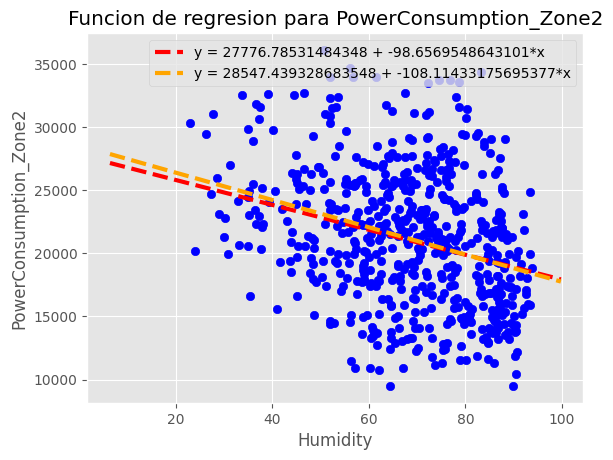

0

In [ ]:
#@title PowerConsumption_Zone2

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'Humidity', 'PowerConsumption_Zone2', sample_shape, random_seed)

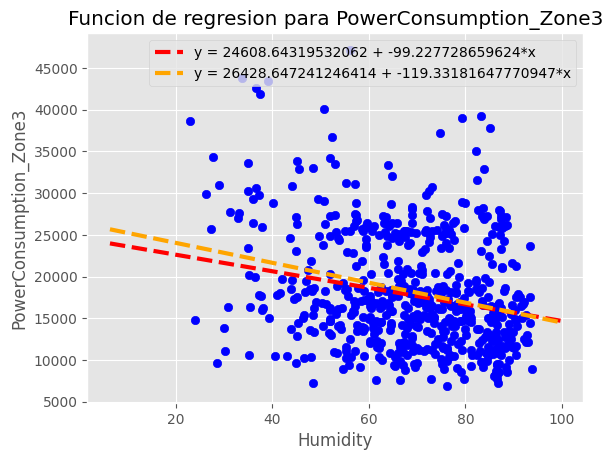

0

In [ ]:
#@title PowerConsumption_Zone3

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'Humidity', 'PowerConsumption_Zone3', sample_shape, random_seed)

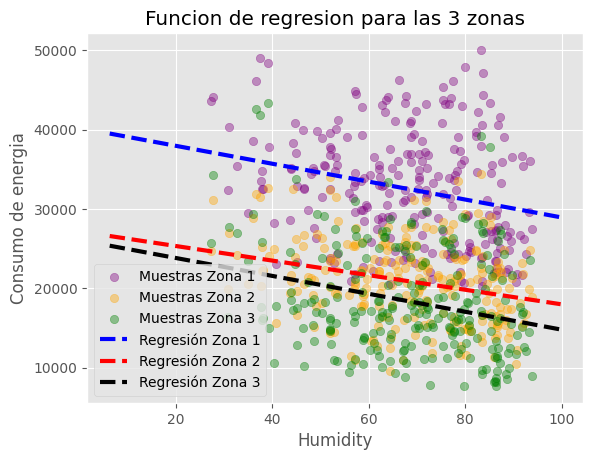

In [ ]:
#@title PowerConsumption_zone1, PowerConsumption_zone2, PowerConsumption_zone3

# Datos
sample_shape = 250 #@param {type:"integer"}
sample = df[['Humidity', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].sample(n=sample_shape, random_state=27)
X = sample['Humidity'].values
Y1 = sample['PowerConsumption_Zone1'].values
Y2 = sample['PowerConsumption_Zone2'].values
Y3 = sample['PowerConsumption_Zone3'].values

# Pendiente y punto de corte
sam_a1, sam_b1 = least_square_regression(X, Y1) # Muestra de la zona 1
sam_a2, sam_b2 = least_square_regression(X, Y2) # Muestra de la zona 1
sam_a3, sam_b3 = least_square_regression(X, Y3) # Muestra de la zona 1

# Funcion de regresion para zona 1 con respecto a la energia
x = np.linspace(df['Humidity'].min() - 5, df['Humidity'].max() + 5)
sam_y1 = sam_a1 + sam_b1*x # Función de regresión para la zona 1
sam_y2 = sam_a2 + sam_b2*x # Función de regresión para la zona 2
sam_y3 = sam_a3 + sam_b3*x # Función de regresión para la zona 3

# Grafica de los puntos y la función
plt.scatter(X, Y1, color=('purple',0.4), label='Muestras Zona 1')
plt.scatter(X, Y2, color=('orange',0.4), label='Muestras Zona 2')
plt.scatter(X, Y3, color=('green',0.4), label='Muestras Zona 3')
plt.plot(x, sam_y1, color='blue', linestyle='--', linewidth=3, label='Regresión Zona 1') # Grafica de regresion de la zona 1
plt.plot(x, sam_y2, color='red', linestyle='--', linewidth=3, label='Regresión Zona 2') # Grafica de regresion de la Zona 2
plt.plot(x, sam_y3, color='k', linestyle='--', linewidth=3, label='Regresión Zona 3') # Grafica de regresion de la Zona 3
plt.title('Funcion de regresion para las 3 zonas')
plt.xlabel('Humidity')
plt.ylabel('Consumo de energia')
plt.legend()
plt.show()

### 7.3 Regresión con respecto a la Velocidad del Viento

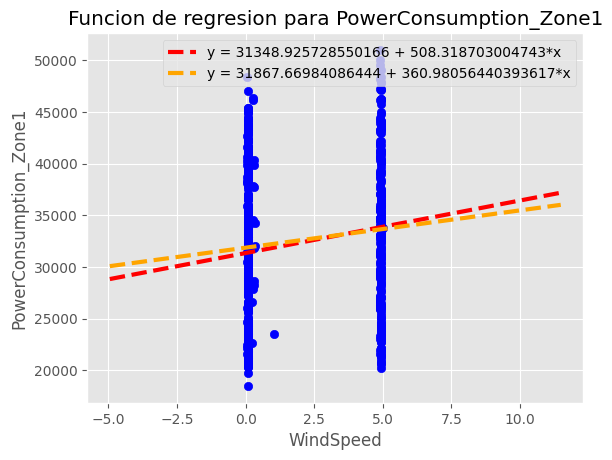

0

In [ ]:
#@title PowerConsumption_Zone1

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'WindSpeed', 'PowerConsumption_Zone1', sample_shape, random_seed)

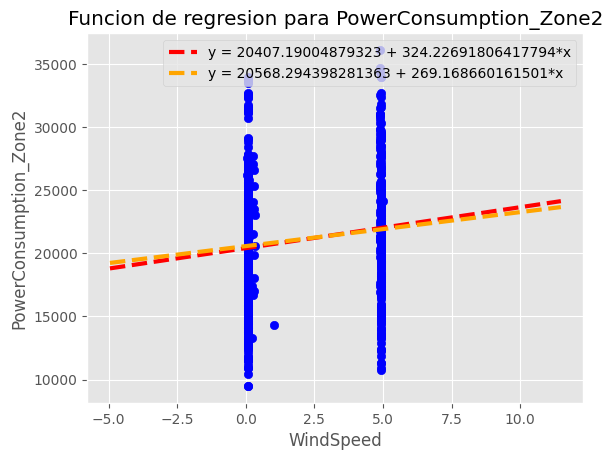

0

In [ ]:
#@title PowerConsumption_Zone2

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'WindSpeed', 'PowerConsumption_Zone2', sample_shape, random_seed)

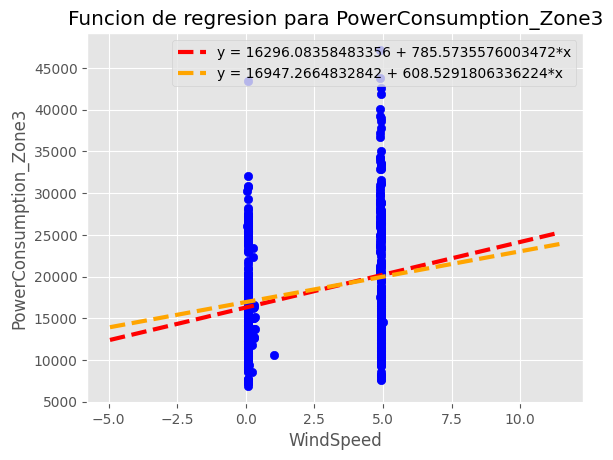

0

In [ ]:
#@title PowerConsumption_Zone3

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'WindSpeed', 'PowerConsumption_Zone3', sample_shape, random_seed)

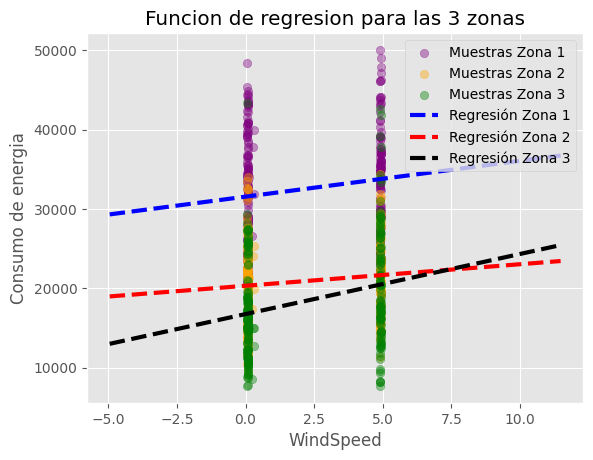

In [ ]:
#@title PowerConsumption_zone1, PowerConsumption_zone2, PowerConsumption_zone3

# Datos
sample_shape = 250 #@param {type:"integer"}
sample = df[['WindSpeed', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].sample(n=sample_shape, random_state=27)
X = sample['WindSpeed'].values
Y1 = sample['PowerConsumption_Zone1'].values
Y2 = sample['PowerConsumption_Zone2'].values
Y3 = sample['PowerConsumption_Zone3'].values

# Pendiente y punto de corte
sam_a1, sam_b1 = least_square_regression(X, Y1) # Muestra de la zona 1
sam_a2, sam_b2 = least_square_regression(X, Y2) # Muestra de la zona 1
sam_a3, sam_b3 = least_square_regression(X, Y3) # Muestra de la zona 1

# Funcion de regresion para zona 1 con respecto a la energia
x = np.linspace(df['WindSpeed'].min() - 5, df['WindSpeed'].max() + 5)
sam_y1 = sam_a1 + sam_b1*x # Función de regresión para la zona 1
sam_y2 = sam_a2 + sam_b2*x # Función de regresión para la zona 2
sam_y3 = sam_a3 + sam_b3*x # Función de regresión para la zona 3

# Grafica de los puntos y la función
plt.scatter(X, Y1, color=('purple',0.4), label='Muestras Zona 1')
plt.scatter(X, Y2, color=('orange',0.4), label='Muestras Zona 2')
plt.scatter(X, Y3, color=('green',0.4), label='Muestras Zona 3')
plt.plot(x, sam_y1, color='blue', linestyle='--', linewidth=3, label='Regresión Zona 1') # Grafica de regresion de la zona 1
plt.plot(x, sam_y2, color='red', linestyle='--', linewidth=3, label='Regresión Zona 2') # Grafica de regresion de la Zona 2
plt.plot(x, sam_y3, color='k', linestyle='--', linewidth=3, label='Regresión Zona 3') # Grafica de regresion de la Zona 3
plt.title('Funcion de regresion para las 3 zonas')
plt.xlabel('WindSpeed')
plt.ylabel('Consumo de energia')
plt.legend()
plt.show()

### 7.4 Regresión con respecto a los Flujos de Difusión General

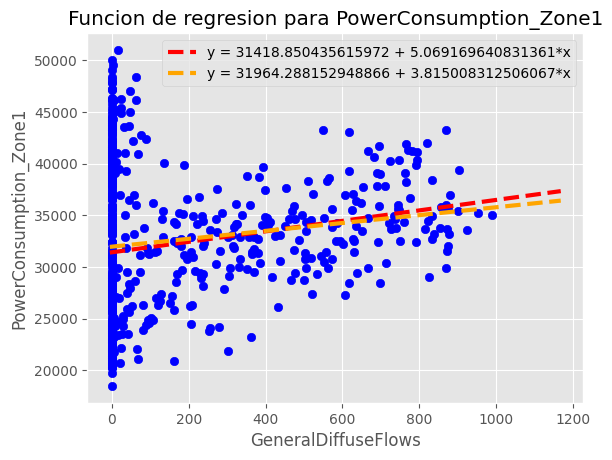

0

In [ ]:
#@title PowerConsumption_Zone1

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'GeneralDiffuseFlows', 'PowerConsumption_Zone1', sample_shape, random_seed)

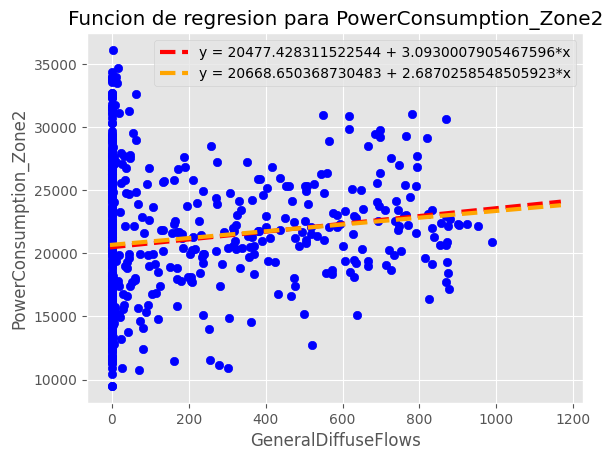

0

In [ ]:
#@title PowerConsumption_Zone2

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'GeneralDiffuseFlows', 'PowerConsumption_Zone2', sample_shape, random_seed)

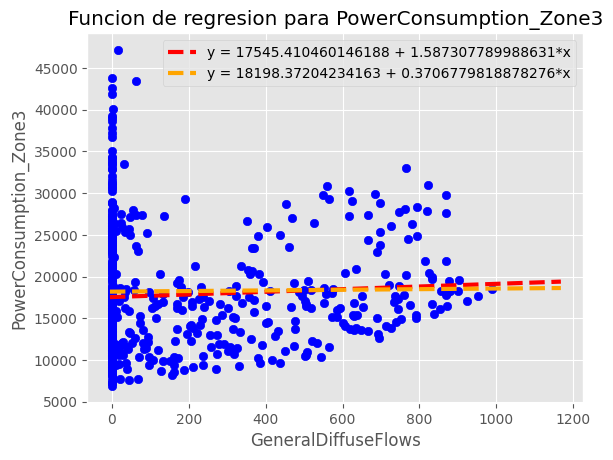

0

In [ ]:
#@title PowerConsumption_Zone3

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'GeneralDiffuseFlows', 'PowerConsumption_Zone3', sample_shape, random_seed)

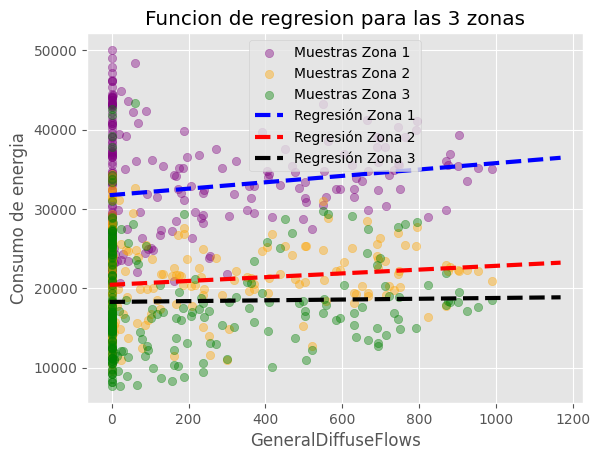

In [ ]:
#@title PowerConsumption_zone1, PowerConsumption_zone2, PowerConsumption_zone3

# Datos
sample_shape = 250 #@param {type:"integer"}
sample = df[['GeneralDiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].sample(n=sample_shape, random_state=27)
X = sample['GeneralDiffuseFlows'].values
Y1 = sample['PowerConsumption_Zone1'].values
Y2 = sample['PowerConsumption_Zone2'].values
Y3 = sample['PowerConsumption_Zone3'].values

# Pendiente y punto de corte
sam_a1, sam_b1 = least_square_regression(X, Y1) # Muestra de la zona 1
sam_a2, sam_b2 = least_square_regression(X, Y2) # Muestra de la zona 1
sam_a3, sam_b3 = least_square_regression(X, Y3) # Muestra de la zona 1

# Funcion de regresion para zona 1 con respecto a la energia
x = np.linspace(df['GeneralDiffuseFlows'].min() - 5, df['GeneralDiffuseFlows'].max() + 5)
sam_y1 = sam_a1 + sam_b1*x # Función de regresión para la zona 1
sam_y2 = sam_a2 + sam_b2*x # Función de regresión para la zona 2
sam_y3 = sam_a3 + sam_b3*x # Función de regresión para la zona 3

# Grafica de los puntos y la función
plt.scatter(X, Y1, color=('purple',0.4), label='Muestras Zona 1')
plt.scatter(X, Y2, color=('orange',0.4), label='Muestras Zona 2')
plt.scatter(X, Y3, color=('green',0.4), label='Muestras Zona 3')
plt.plot(x, sam_y1, color='blue', linestyle='--', linewidth=3, label='Regresión Zona 1') # Grafica de regresion de la zona 1
plt.plot(x, sam_y2, color='red', linestyle='--', linewidth=3, label='Regresión Zona 2') # Grafica de regresion de la Zona 2
plt.plot(x, sam_y3, color='k', linestyle='--', linewidth=3, label='Regresión Zona 3') # Grafica de regresion de la Zona 3
plt.title('Funcion de regresion para las 3 zonas')
plt.xlabel('GeneralDiffuseFlows')
plt.ylabel('Consumo de energia')
plt.legend()
plt.show()

### 7.5 Regresión con respecto a los Flujos de Difusión

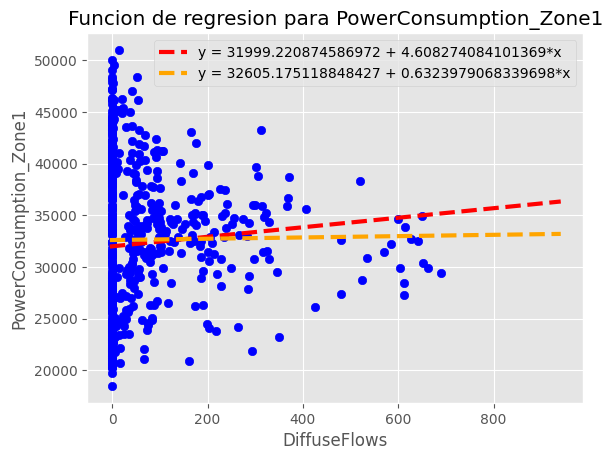

0

In [ ]:
#@title PowerConsumption_Zone1

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'DiffuseFlows', 'PowerConsumption_Zone1', sample_shape, random_seed)

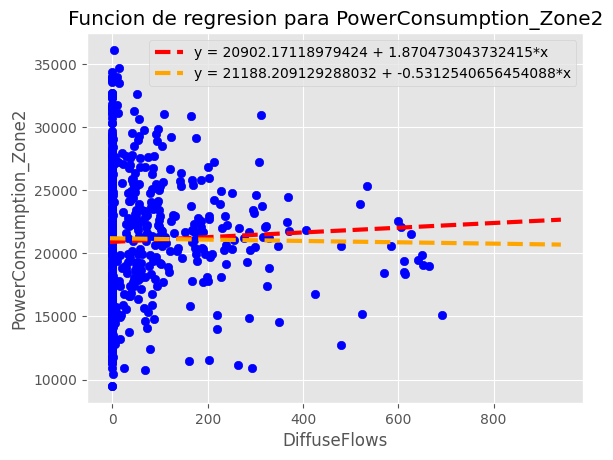

0

In [ ]:
#@title PowerConsumption_Zone2

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'DiffuseFlows', 'PowerConsumption_Zone2', sample_shape, random_seed)

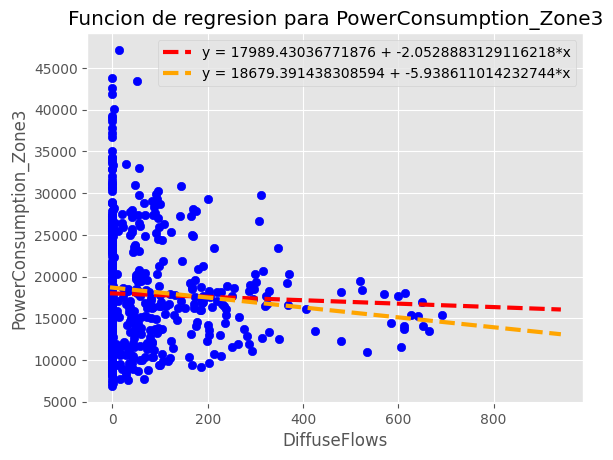

0

In [ ]:
#@title PowerConsumption_Zone3

# Calculo de y grafica de la pendiente
sample_shape = 600 #@param {type:"integer"}
random_seed = 27 #@param {type:"integer"}
plot_regression(df, 'DiffuseFlows', 'PowerConsumption_Zone3', sample_shape, random_seed)

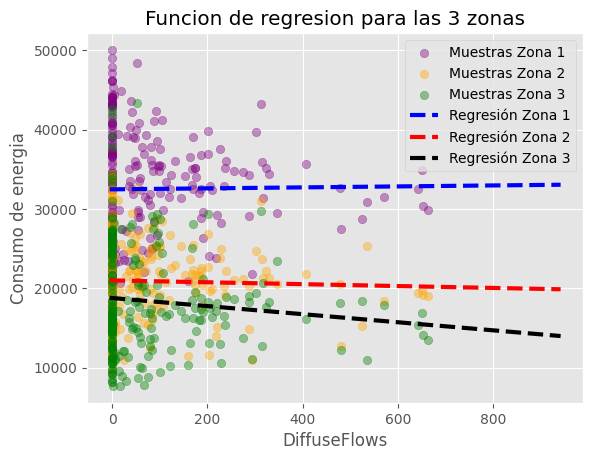

In [ ]:
#@title PowerConsumption_zone1, PowerConsumption_zone2, PowerConsumption_zone3

# Datos
sample_shape = 250 #@param {type:"integer"}
sample = df[['DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].sample(n=sample_shape, random_state=27)
X = sample['DiffuseFlows'].values
Y1 = sample['PowerConsumption_Zone1'].values
Y2 = sample['PowerConsumption_Zone2'].values
Y3 = sample['PowerConsumption_Zone3'].values

# Pendiente y punto de corte
sam_a1, sam_b1 = least_square_regression(X, Y1) # Muestra de la zona 1
sam_a2, sam_b2 = least_square_regression(X, Y2) # Muestra de la zona 1
sam_a3, sam_b3 = least_square_regression(X, Y3) # Muestra de la zona 1

# Funcion de regresion para zona 1 con respecto a la energia
x = np.linspace(df['DiffuseFlows'].min() - 5, df['DiffuseFlows'].max() + 5)
sam_y1 = sam_a1 + sam_b1*x # Función de regresión para la zona 1
sam_y2 = sam_a2 + sam_b2*x # Función de regresión para la zona 2
sam_y3 = sam_a3 + sam_b3*x # Función de regresión para la zona 3

# Grafica de los puntos y la función
plt.scatter(X, Y1, color=('purple',0.4), label='Muestras Zona 1')
plt.scatter(X, Y2, color=('orange',0.4), label='Muestras Zona 2')
plt.scatter(X, Y3, color=('green',0.4), label='Muestras Zona 3')
plt.plot(x, sam_y1, color='blue', linestyle='--', linewidth=3, label='Regresión Zona 1') # Grafica de regresion de la zona 1
plt.plot(x, sam_y2, color='red', linestyle='--', linewidth=3, label='Regresión Zona 2') # Grafica de regresion de la Zona 2
plt.plot(x, sam_y3, color='k', linestyle='--', linewidth=3, label='Regresión Zona 3') # Grafica de regresion de la Zona 3
plt.title('Funcion de regresion para las 3 zonas')
plt.xlabel('DiffuseFlows')
plt.ylabel('Consumo de energia')
plt.legend()
plt.show()

## 8. Regresión lineal múltiple

In [ ]:
def plot_regression_3d(x1,x2,y,b0,b1,b2,title,elev=10,z=60):
    x1_range = np.linspace(x1.min(),x1.max(),1000)
    x2_range = np.linspace(x2.min(),x2.max(),1000)
    X1g, X2g = np.meshgrid(x1_range,x2_range)
    Yg = b0 + b1*X1g + b2*X2g #En la malla
    fig = plt.figure(figsize=(11,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y, label='Datos', depthshade=True)
    ax.plot_surface(X1g, X2g, Yg, alpha=0.5, edgecolor='none', color='blue')
    if  elev and z: 
        ax.view_init(elev=elev, azim=z)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_zlabel(r'$y$')
    ax.set_title(f'Regresión Lineal Múltiple {title}')
    ax.legend()

    plt.show()

In [10]:
def matrix_linear_regression(X,y):
    X=np.column_stack((np.ones(X.shape[0]),X))
    return np.linalg.inv(X.T@X)@X.T@y

### 8.2 Regresión lineal múltiple con respecto a la Temperatura y Humedad

#### Para la zona 1

In [11]:
X=np.column_stack([df['Temperature'].values,df['Humidity'].values])
X.shape

(52416, 2)

In [ ]:
b0,b1,b2=matrix_linear_regression(X,df['PowerConsumption_Zone1'].values)
b0,b1,b2

(26701.98573797668, 479.04648211018934, -49.33950689182208)

El modelo de regresión lineal múltiple para ```PowerConsumption_Zone1``` con respecto a la temperatura y la humedad se puede expresar como: 
$$
\hat{y} = 26701.98 + 479.04x_0 -49.33x_1
$$
donde:
$x_0$ es la temperatura y $x_1$ es la humedad.

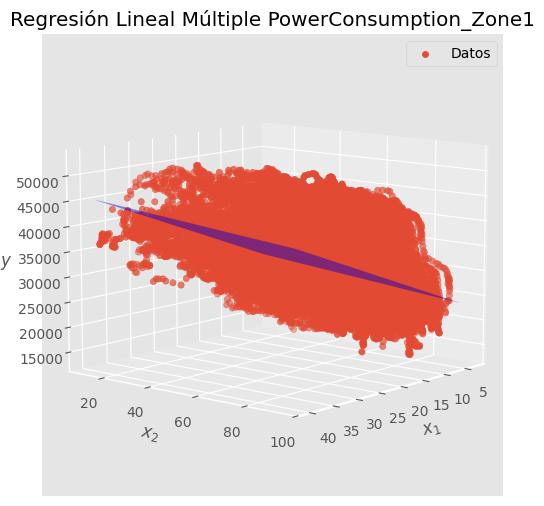

In [ ]:
plot_regression_3d(df['Temperature'].values,df['Humidity'].values,df['PowerConsumption_Zone1'].values,b0,b1,b2,'PowerConsumption_Zone1',elev=10,z=30)

In [39]:
r2_score(df['PowerConsumption_Zone1'].values,b0+b1*df['Temperature'].values+b2*df['Humidity'].values)

0.20292058532103785

#### Para la zona 2

In [53]:
b0,b1,b2=matrix_linear_regression(X,df['PowerConsumption_Zone2'].values)
b0,b1,b2

(19222.7846950422, 279.9244086695437, -50.47882734506108)

El modelo de regresión lineal múltiple para ```PowerConsumption_Zone1``` con respecto a la temperatura y la humedad se puede expresar como: 
$$
\hat{y} = 19222.78 + 279.92x_0 -50.47x_1
$$
donde:
$x_0$ es la temperatura y $x_1$ es la humedad.

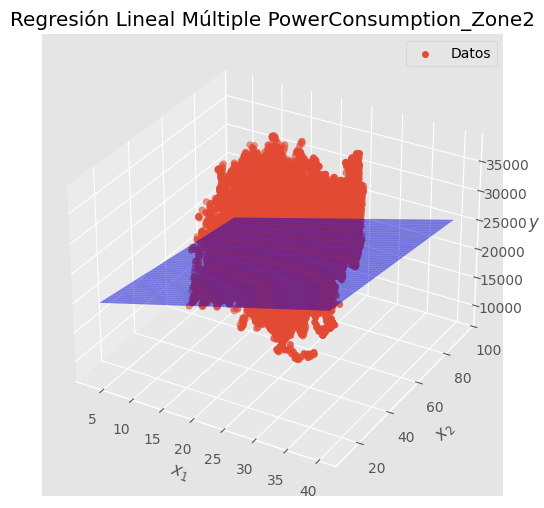

In [54]:
plot_regression_3d(df['Temperature'].values,df['Humidity'].values,df['PowerConsumption_Zone2'].values,b0,b1,b2,'PowerConsumption_Zone2',elev=None,z=None)

In [55]:
r2_score(df['PowerConsumption_Zone2'].values,b0+b1*df['Temperature'].values+b2*df['Humidity'].values)

0.1642034276365948

#### Para la zona 3

In [56]:
b0,b1,b2=matrix_linear_regression(X,df['PowerConsumption_Zone3'].values)
b0,b1,b2

(7731.37230216893, 552.2983086750086, -4.171000771981019)

El modelo de regresión lineal múltiple para ```PowerConsumption_Zone1``` con respecto a la temperatura y la humedad se puede expresar como: 
$$
\hat{y} = 7731.37 + 552.29x_0 -4.171x_1
$$
donde:
$x_0$ es la temperatura y $x_1$ es la humedad.

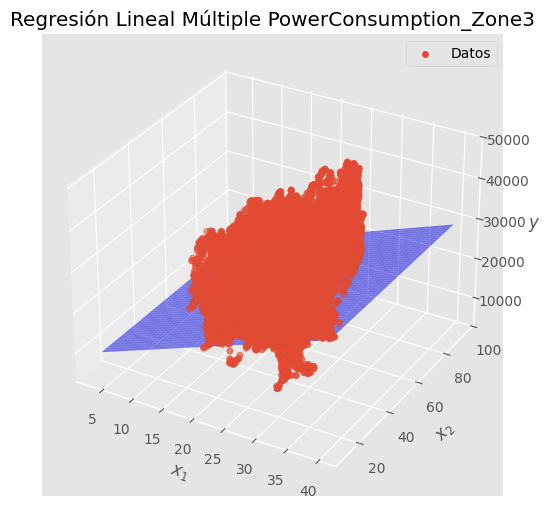

In [57]:
plot_regression_3d(df['Temperature'].values,df['Humidity'].values,df['PowerConsumption_Zone3'].values,b0,b1,b2,'PowerConsumption_Zone3',elev=None,z=None)

In [58]:
r2_score(df['PowerConsumption_Zone3'].values,b0+b1*df['Temperature'].values+b2*df['Humidity'].values)

0.23971260460868515